**ClusterAI 2021** 
<br> **Ciencia de Datos - Ingeniería Industrial UTN BA** 
<br> **Curso I5521** 
<br> **Docente: Martín Palazzo**
<br> **Tutor: Andrés De Leo**
<br> **Proyecto: Análisis de Duración deProyectos de Investigación** 
<br> **Elaborado por: Gastón Rimbano**


# Importamos Librerías y creamos Funciones

In [1]:
# Datos
import pandas as pd
import numpy as np

# Graficos 
import matplotlib.pyplot as plt
import seaborn as sns

# Otros 
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

pd.options.display.float_format = "{:,.2f}".format

In [73]:
# En esta celda definimos las funciones que utilizaremos
# -O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-
def informar_registros_perdidos(cur_nreg:int, last_nreg:int, init_nreg:int=None):
    """
    Esta función lo que hace es informar la cantidad de 
    registros que hemos perdido en una operación particular, 
    calculando la diferencia entre los estados indicados.
    En caso de que se le indique el parámetro 'init_nreg',
    informará también la cantidad total de registros que
    se han perdido respecto de un estado inicial indicado.
    
    last_nreg: int
    Última cantidad de registros. Registros que se tenía antes de la operación.
    
    cur_nreg: int
    Cantidad de registros actual. Cantidad de registros que quedaron luego de la operación.
    
    init_nreg: int, optional (default=None)
    Cantidad de registros que tenía el Data Frame antes de ser pre-procesado.
    Si se indica este parámetro, entonces se puede informar la cantidad total
    de registros que se lleva perdida
    """
    
    # Calculamos la cantidad de registros perdidos en la operación.
    # Tanto en valor numérico como porcentual.
    partial_n_reg_loss = last_nreg - cur_nreg
    partial_perc_reg_loss = (partial_n_reg_loss / last_nreg) * 100
    
    # Informamos la cantidad de registros actual.
    print('El NUEVO TOTAL de registros del Data Set luego de la última operación es de %i.\n' 
          % cur_nreg )
    
    # Informamos la cantidad de registros perdidos en la operación.
    print('En la última operación se han perdido %i registros, ' % partial_n_reg_loss )
    print('lo que representa un %0.2f%% del los %i registros que teniamos antes de la misma.\n'
          % (partial_perc_reg_loss, last_nreg) )
    
    # Verificamos si tenemos el dato de registros iniciales.
    if init_nreg != None:
        # Calculamos el total de registros perdidos al momento.
        # Tanto en valor numérico como porcentual.
        total_n_reg_loss = init_nreg - cur_nreg
        total_perc_reg_loss = (total_n_reg_loss / init_nreg) * 100
        
        # Informamos la cantidad total de registros perdidos.
        print('En lo que va del procesamiento se han perdido %i registros,' % total_n_reg_loss )
        print('lo que representa un %0.2f%% del total inicial de %i de registros iniciales.\n'
              % (total_perc_reg_loss, init_nreg) )


# -O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-
def informar_NaNs(data: pd.DataFrame):
    """
    Esta función genera un Pandas Data Frame para informar
    los registros nulos del data set que se le pasa.
    Se consigue visualizar de una manera más estetica las 
    columnas con mayor cantidad de registros nulos, ya que 
    los ordena de manera descendente, permitiendo además ver 
    que porcentaje del Data Set representa la cantidad de nulos 
    de cada columna.
    
    data: pandas.DataFrame
    Data Frame sobre el que se desea ver la cantidad de registros nulos.
    """
    
    # Contamos el número de valores NaN de cada columna
    n_na = data.isnull().sum().sort_values(ascending=False)
    
    # Contamos la cantidad total de registros
    n_tot = data.shape[0]
    
    # Calculamos el porcentaje que cada uno representa respecto del total de filas
    na_perc = round(n_na / n_tot * 100, 2)

    missing = pd.concat((n_na, na_perc), axis=1, keys=['Total', 'Percent'])
    missing = missing[ missing['Total'] != 0 ]
    display(missing)

    print('\n' + '_'*100)
    print('Base: %i Registros' % n_tot)
    

# -O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-
def obtener_outliers_threshold(serie:pd.Series, low_perc_lim:int=None, high_perc_lim:int=None):
    """
    Esta función calcula el "umbral" de outliers de un Pandas Series.
    Lo hace utilizando el criterio de percentiles, por lo que se le debe informar 
    el percentil para el umbral inferior y/o el percentil para el umbral superior.
    
    serie: pandas.Series
    Serie sobre la que se desea calcular los percentiles para obtener los umbrales.
    
    low_perc_lim: int, optional (default=None)
    Percentil sobre el que se tomará el umbral inferior.
    Debe expresarse de 0 a 100.
    
    high_perc_lim: int, optional (default=None)
    Percentil sobre el que se tomará el umbral superior.
    Debe expresarse de 0 a 100.
    """
    
    serie_sin_na = serie.dropna()
    
    if low_perc_lim != None:
        lower_threshold = serie_sin_na.quantile(low_perc_lim/100)
    
    if high_perc_lim != None:
        higher_threshold = serie_sin_na.quantile(high_perc_lim/100)
    
    if (low_perc_lim != None) & (high_perc_lim != None):
        return lower_threshold, higher_threshold
    elif low_perc_lim != None:
        return lower_threshold
    elif high_perc_lim != None:
        return higher_threshold

# -O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-
def informar_outliers(data:pd.DataFrame, col:str, low_perc_lim:int=None, high_perc_lim:int=None):
    """
    Esta función informa la cantidad de registros que pueden 
    ser considerados outliers, tanto por estar debajo del umbral 
    inferior, como por estar por encima del umbral superior.
    También informa la cantidad TOTAL de registros que serían outliers.
    
    data: pandas.DatFrame
    Data Frame que posee la columna sobre la que 
    se quiera calcular la cantidad de outliers
    
    col: str
    Columna del Data Frame (data) sobre la que se quiera 
    calcular la cantidad de outliers
    
    low_perc_lim: int, optional (default=None)
    Percentil sobre el que se tomará el umbral inferior.
    Debe expresarse de 0 a 100.
    
    high_perc_lim: int, optional (default=None)
    Percentil sobre el que se tomará el umbral superior.
    Debe expresarse de 0 a 100.
    """
    
    data_sin_na = data.dropna()
    
    print('Para la columna %s se informan outliers de la siguiente manera.' % (col) )
    
    if low_perc_lim != None:
        lower_limit = obtener_outliers_threshold(serie= data[col], low_perc_lim= low_perc_lim)
        qty_low_outliers = data_sin_na[data_sin_na[col] < lower_limit].shape[0]
        print('Límite Percentil %i = %i\t=>\t%i Registros por debajo'
             % (low_perc_lim, lower_limit, qty_low_outliers) )
    
    if high_perc_lim != None:
        higher_limit = obtener_outliers_threshold(serie= data[col], high_perc_lim= high_perc_lim)
        qty_high_outliers = data_sin_na[data_sin_na[col] > higher_limit].shape[0]
        print('Límite Percentil %i = %i\t=>\t%i Registros por encima'
             % (high_perc_lim, higher_limit, qty_high_outliers) )
    
    if (low_perc_lim != None) & (high_perc_lim != None):
        print('_'*50)
        print('TOTAL DE OUTLIERS = %i' % (qty_low_outliers + qty_high_outliers))


# -O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-
def counted_catvar_df(data:pd.DataFrame, index_col:str, cat_col:str):
    """
    Esta función crea un Data Frame que contine como índices de fila 
    los distintos valores de la columna 'index_col' del Data Frame 'data',
    mientras que las columnas tendrá los diferentes valores que presenta la
    columna con información categórica 'cat_col'. Los valores del Data Frame
    serán entonces la cantidad de registros que existen que cumplan ambas 
    condiciones, es decir, que tengan el valor del índice en la columna
    'index_col' y la categía correspondiente a la columna en 'cat_col'.
    
    data: pandas.DataFrame
    Data Frame de partida, al que pertenecen las 
    columnas que se tomarán como 'index_col' y 'cat_col'
    
    index_col: str
    Columna del Data Frame 'data' que se tomará como índice
    del nuevo Data Frame en el que se muestra cantidad de registros
    que cumplen con las condiciones especificadas. Esta columna
    puede tener valores numéricos o categóricos.
    
    cat_col: str
    Columna del Data Frame 'data' que posee los valores categóricos
    a contar. Los distintos valores categóricos que tome esta columna
    serán el nombre de las columnas de nuestro nuevo Data Frame.
    """
    
    index = data[index_col].sort_values().unique().tolist()
    columns = data[cat_col].unique().tolist()

    rows = []

    for idx in index:
        row = []
        for col in columns:
            idx_filter = (data[index_col] == idx)
            col_filter = (data[cat_col] == col)

            n_reg = data[idx_filter & col_filter].shape[0]

            row.append(n_reg)

        rows.append(row)

    counted_df = pd.DataFrame(data= rows, columns= columns, index= index)
    
    return counted_df

# -O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-
def list_values_formater(lst:list, fmt:str='str'):
    """
    Esta función convierte todas las instancias de 
    la lista 'lst' en el formato indicado en 'fmt'.
    
    lst: list
    Lista a la que se le convertirá el formato de sus instancias
    
    fmt: str, opcional (default='str')
    Este parámetro indica el formato al que se convertirán
    las instancias de la lista 'lst'. Por defecto, se 
    convertirán a formato String.
    """
    
    for i in range(0, len(lst) ):
        if fmt == 'str':
            lst[i] = str(lst[i])
        elif fmt == 'int':
            lst[i] = int(lst[i])
        elif fmt == 'float':
            lst[i] = float(lst[i])
        
    return lst


# -O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-O-
def stacked_bars_graph(data:pd.DataFrame,
                       group_col:str, cat_col:str,
                       percent:bool=True, table:bool=True, 
                       figsize=(20,10), ax=None):
    
    """
    Esta función genera gráficos de barras apiladas, 
    dando la opción de que se cuente por cantidad o se 
    muestre la distribución porcentual de cada categoría.
    
    data: pandas.DataFrame
    Data Frame del que se tomará la información para
    generar el gráfico de columnas apiladas.
    
    group_col: str
    Columna del Data Frame 'data' cuyos valores se utilizarán 
    para generar las diferentes columnas. Es decir, los valores 
    de esta columna son los que se mostrarán en el 'Eje x' del gráfico.
    
    cat_col: str
    Columna del Data Frame 'data' cuyos valores categóricos
    se utilizarán para generar las diferentes categorías por las
    que se apilará la información en cada columna del gráfico.
    
    percent: bool, optional (default=True)
    Este parámetro permite indicar si el gráfico se desea mostrar
    como distribución porcentual de las diferentes categorías, o bien,
    simplemente se desea mostrar la cantidad correspondiente.
    
    table: bool, optional (default=True)
    Este parámetro permite indicar si se desea mostrar o no al pie
    del gráfico una tabla con el total correspondiente a cada columna.
    
    figsize: list, optional (default=(20,10))
    Tamaño que tendrá el gráfico a generar.
    
    ax: matplotlib.pyplot.axes, optional (default=None)
    En caso de que el gráfico pertenezca a un subplot de pyplot,
    mediante este parámetro puede indicarse a cual debe asignarse.
    """
    
    counted_df = counted_catvar_df(data= data, index_col= group_col, cat_col= cat_col)
    
    if percent:
        counted_df = counted_df.div(counted_df.sum(axis=1), axis=0)
        counted_df = counted_df.mul(100, axis=0)
        
    
    if ax == None:
        ax= plt.gca()
    
    
    sns.set(context="talk", style='whitegrid')
    
    counted_df.plot.bar(stacked= True, figsize=figsize, ax=ax)
    legend = plt.legend(title=cat_col + ':',
                        fontsize='medium', 
                        loc='center left', 
                        bbox_to_anchor=(1.05, 0.5))
    legend._legend_box.align = "left"

    if table:
        plt.xticks([])
        
        group_total = data.groupby(group_col)[cat_col].count().to_list()
        group_total_row = []
        group_total_row.append( list_values_formater(lst= group_total, fmt='str') )
        
        table = ax.table(cellText= group_total_row,
                          colLabels= counted_df.index.to_list(),
                          rowLabels= ['TOTAL'],
                          loc='bottom', cellLoc='center')
        table.set_fontsize(20)
        table.scale(1,3)

    return ax

# Data Sets
Para el proyecto trabajaremos con los datos de **Proyectos de ciencia, tecnología e innovación**, cuyo repositorio se encuentra en el siguiente link:<br>
https://datos.gob.ar/dataset/mincyt-proyectos-ciencia-tecnologia-e-innovacion

El repositorio contiene varios archivos. Entre ellos podemos encontrar un Data Set con datos de proyectos comprendidos entre los años 2008 y 2019, y otros archivos, con referencias de Disciplinas, Estado del Proyecto, Moneda, entre otra información.

Dado que los datos se encuentran separados en un Archivo por Año, nos proponemos analizar la compatibilidad entre archivos para poder unificar todo en un único Data Set. Una vez hecho esto, procederemos a realizar un análisis del mismo.

## Verificamos Compatibilidad entre Data Sets de cada Año
Vamos a analizar el shape de cada año para asegurarnos que tengan todos la misma cantidad de columnas.

In [93]:
# Ponemos el contador de filas en cero
total_rows = 0

# Ejecutamos la verificación de columnas para los Data Sets de 2008 a 2019
año_inicio = 2008
año_fin = 2019
for i in range(año_inicio, año_fin, 1):
    # Generamos la ruta del Data Set del año correspondiente
    i_file_name = 'data/origen/proyectos_' + str(i) + '.csv'
    
    # Importamos el Data Set del año correspondiente
    df_i = pd.read_csv(i_file_name, delimiter=';')
    
    # Informamos la cantidad de columnas del Data Set del año correspondiente
    print("El Data Set del año " + str(i) + ' tiene ' + str(df_i.shape[1]) + ' columnas.')
    
    # Sumamos la cantidad de filas al total general
    total_rows += df_i.shape[0]

# Informamos el total general de filas obtenido luego de sumar todos los años
print('\n'+'En total tendremos unas ' + str(total_rows) + ' filas.')

El Data Set del año 2008 tiene 19 columnas.
El Data Set del año 2009 tiene 19 columnas.
El Data Set del año 2010 tiene 19 columnas.
El Data Set del año 2011 tiene 19 columnas.
El Data Set del año 2012 tiene 19 columnas.
El Data Set del año 2013 tiene 19 columnas.
El Data Set del año 2014 tiene 19 columnas.
El Data Set del año 2015 tiene 19 columnas.
El Data Set del año 2016 tiene 19 columnas.
El Data Set del año 2017 tiene 19 columnas.
El Data Set del año 2018 tiene 19 columnas.
El Data Set del año 2019 tiene 19 columnas.

En total tendremos unas 19266 filas.


Como vemos, los Data Sets de todos los años cuentan con la misma cantidad de columnas.

Ahora evaluaremos que los nombre de las columnas de cada uno de los Data Sets coincidan. De esta manera nos aseguraremos de que no habrá problemas al unificar todos los Data Sets en uno único.

In [94]:
# Evaluaremos los nombres de las columnas de los Data Set desde 2008 a 2019.
año_inicio = 2008
año_fin = 2019

# Para eso utilizaremos un for que recorrerá el rango de años
# y comparará el nombre de las columnas, asegurando la compatibilidad
for i in range(año_inicio, año_fin+1, 1):
    # Cargamos el data set correspondiente a cada año
    i_file_name = 'data/origen/proyectos_' + str(i) + '.csv'
    df_i = pd.read_csv(i_file_name, delimiter=';')
    
    # En caso de que sea el año de inicio, debemos guardar 
    # el nombre de las columnas en un Numpy Array
    if i == año_inicio:
        columnas = df_i.columns.values
        print('Las columnas del Data Set del ' + str(año_inicio) + ' son: \n')
        print(columnas)
        print()
    
    # Si no se trata del año de inicio, debemos comparar que las columnas coincidan
    elif (columnas == df_i.columns.values).all():
        # De ser así, lo notificaremos.
        print(str(i) + ': Las columnas COINCIDEN!')
        
    else:
        # De no coincidir, mostraremos cuales son las columnas.
        print('Para el ' + str(i) + ' no coinciden las columnas. Estas son:')
        print(columnas_i)

Las columnas del Data Set del 2008 son: 

['proyecto_id' 'proyecto_fuente' 'titulo' 'fecha_inicio'
 'fecha_finalizacion' 'resumen' 'moneda_id' 'monto_total_solicitado'
 'monto_total_adjudicado' 'monto_financiado_solicitado'
 'monto_financiado_adjudicado' 'tipo_proyecto_id' 'codigo_identificacion'
 'palabras_clave' 'estado_id' 'fondo_anpcyt' 'cantidad_miembros_F'
 'cantidad_miembros_M' 'sexo_director']

2009: Las columnas COINCIDEN!
2010: Las columnas COINCIDEN!
2011: Las columnas COINCIDEN!
2012: Las columnas COINCIDEN!
2013: Las columnas COINCIDEN!
2014: Las columnas COINCIDEN!
2015: Las columnas COINCIDEN!
2016: Las columnas COINCIDEN!
2017: Las columnas COINCIDEN!
2018: Las columnas COINCIDEN!
2019: Las columnas COINCIDEN!


Dado que todos los Data Sets cuentan no solo con la misma cantidad de columnas, si no que también todas ellas coinciden, estamos en condiciones de proponernos unificar el Data Set.

## Unificamos Data Sets

In [95]:
# Unificaremos los Data Set desde 2008 a 2019.
año_inicio = 2008
año_fin = 2019

# Para eso recorreremos un ciclo for para esos años, en el que
# iremos agregando datos a un único Pandas Data Frame.
for i in range(año_inicio, año_fin+1, 1):
    # Cargamos el data set correspondiente a cada año
    i_file_name = 'data/origen/proyectos_' + str(i) + '.csv'
    i_df = pd.read_csv(i_file_name, delimiter= ';')
    
    # Analisamos si se trata del año de inicio
    if i == año_inicio:
        # Si se trata del año de inicio, creamos el comienzo del Data Set final.
        df_proyectos = i_df
    else:
        # En caso de que no sea el año de inicio, debemos agregar el Data Set
        # del año en curso, al Data Set que va recopilando todo.
        df_proyectos = pd.concat([df_proyectos, i_df])
    
# Finalmente verificamos la cantidad de columnas y filas que tendrá nuestro Data Set
print('El Data Set unificado tiene un total de ' + str(df_proyectos.shape[1])
     + ' columnas y ' + str(df_proyectos.shape[0]) + ' filas.')

El Data Set unificado tiene un total de 19 columnas y 19266 filas.


Como vemos, el resultado obtenido es el esperado, ya que tenemos las 19 columnas que verificamos inicialmente, y 19.266 filas, que son las que hemos calculado al comienzo.

## Exportamos Data Set Unificado
Esto nos permitirá utilizar el Data Set Unificado sin necesidad de volver a ejecutar todas las celdas necesarias para combinar los distintos archivos correspondientes a cada año.

In [96]:
# Generamos la ruta y el nombre con el que se almacenará el Data Set Unificado
file_name = 'data/procesada/proyectos_unificado.csv'
# Generamos el tipo de separador con el que queremos que se exporte
sep = ';'

# Pasamos los valores indicados más arriba e indicamos que no queremos que exporte el index
df_proyectos.to_csv(file_name, sep=sep, header=True, index=False)

# Tratamiento del Data Set Unificado
Importamos el Data Set Unificado y procedemos a determinar las columnas que pueden ser de utilidad, y sobre cuáles debemos aplicar transformaciones.

## Análisis Básico de Data Set de Proyectos

In [3]:
# Importamos Data Set unificado, indicando las columnas que se deben convertir en formato fecha
df_proyectos = pd.read_csv('data/procesada/proyectos_unificado.csv', delimiter= ';', 
                           parse_dates= ['fecha_inicio', 'fecha_finalizacion'])

# Vemos que aspecto tiene
df_proyectos.tail()

,proyecto_id,proyecto_fuente,titulo,fecha_inicio,fecha_finalizacion,resumen,moneda_id,monto_total_solicitado,monto_total_adjudicado,monto_financiado_solicitado,monto_financiado_adjudicado,tipo_proyecto_id,codigo_identificacion,palabras_clave,estado_id,fondo_anpcyt,cantidad_miembros_F,cantidad_miembros_M,sexo_director
19261,24649,CONICET,Dinámica de patosistemas de importancia agríco...,2019-04-01,2023-03-31,Estreses de origen biótico en cultivos agrícol...,1,"5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00",23.00,22920180100064CO,fitopatología; modelos predictivos; pronostico...,2,NaN,19.00,11.00,F
19262,24650,CONICET,"Virus, biomoléculas y líneas celulares biodise...",2019-04-01,2023-03-31,La sanidad y el bienestar animal resultan seri...,1,"5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00",23.00,22920180100065CO,bioingeniería; virus; salud animal,2,NaN,38.00,14.00,F
19263,24651,CONICET,Análisis del impacto ambiental de la producció...,2019-04-01,2023-03-31,"La producción animal, especialmente en sistema...",1,"4,980,000.00","4,980,000.00","4,980,000.00","4,980,000.00",23.00,22920180100066CO,produccion animal; contaminación ambiental; hu...,2,NaN,17.00,12.00,F
19264,24652,CONICET,ESTRATEGIAS DE MEJORAMIENTO DE NUEVA GENERACIÓ...,2019-04-01,2023-03-31,La adopción por parte de los programas de mejo...,1,"5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00",23.00,22920180100067CO,SELECCIÓN GENOMICA ; MAPEO QTL; EDICION GENICA,2,NaN,20.00,9.00,F
19265,24653,CONICET,ESTRATEGIAS DE MEJORAMIENTO DE NUEVA GENERACIÓ...,2019-04-01,2023-03-31,La adopción por parte de los programas de mejo...,1,"5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00",23.00,22920180100068CO,SELECCIÓN GENOMICA; MAPEO QTL; EDICION GENICA,2,NaN,41.00,17.00,F


Ahora evaluaremos rápidamente las características del Data Set utilizando ***.info()***.

In [4]:
df_proyectos.info()
df_proyectos['tipo_proyecto_id'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19266 entries, 0 to 19265
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   proyecto_id                  19266 non-null  int64         
 1   proyecto_fuente              19266 non-null  object        
 2   titulo                       19266 non-null  object        
 3   fecha_inicio                 19266 non-null  datetime64[ns]
 4   fecha_finalizacion           15257 non-null  datetime64[ns]
 5   resumen                      19220 non-null  object        
 6   moneda_id                    19266 non-null  int64         
 7   monto_total_solicitado       18593 non-null  float64       
 8   monto_total_adjudicado       19266 non-null  float64       
 9   monto_financiado_solicitado  18593 non-null  float64       
 10  monto_financiado_adjudicado  19266 non-null  float64       
 11  tipo_proyecto_id             17307 non-nu

array([ 6.,  1.,  5.,  4., 11.,  9., 13., 22., 26., 27., 28., 19.,  8.,
       20., 21., 14.,  2.,  7., 12., 18., nan, 25., 15., 24.,  3., 17.,
       31., 30., 23.])

Del resultado anterior, podemos rescatar que, al verificar que todas las **columnas id** tengan formato '*int*', nos encontramos con que **tipo_proyecto_id** no cumple esto. Al analizar los valores que toma, vemos que se debe a que posee valores nulos. Veremos la cantidad de registros nulos y luego decidiremos que hacer con la columna.

Ahora aprovecharemos para cambiar el nombre de la columna **proyecto_fuente** por **institucion_origen**, ya que en la misma se indica la institución en la que se han originado los datos y, por ende, que rige cada proyecto.

Antes de modificar estos datos, crearemos un nuevo Data Frame,  al que llamaremos **df_proyectos_pp**, haciendo referencia a que se trata de un **Data Set Pre-Procesado**.

Procedemos entonces a convertir el tipo de estas columnas al formato correspondiente, y verificamos la transformación.

In [5]:
# Creamos una copia de nuestro Data Frame original, sobre la que haremos las modificaciones
# Si se indica 'deep=True' las modificaciones que se realicen 
# sobre el nuevo Data Frame no afectarán a nuestro Data Set original.
df_proyectos_pp = df_proyectos.copy(deep=True)

# Renombramos la comlumna 'proyecto_fuente' por 'institucion_origen'
df_proyectos_pp.rename(columns= {'proyecto_fuente': 'institucion_origen'}, inplace=True)

# Verificamos que se hayan aplicado los cambios deseados
df_proyectos_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19266 entries, 0 to 19265
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   proyecto_id                  19266 non-null  int64         
 1   institucion_origen           19266 non-null  object        
 2   titulo                       19266 non-null  object        
 3   fecha_inicio                 19266 non-null  datetime64[ns]
 4   fecha_finalizacion           15257 non-null  datetime64[ns]
 5   resumen                      19220 non-null  object        
 6   moneda_id                    19266 non-null  int64         
 7   monto_total_solicitado       18593 non-null  float64       
 8   monto_total_adjudicado       19266 non-null  float64       
 9   monto_financiado_solicitado  18593 non-null  float64       
 10  monto_financiado_adjudicado  19266 non-null  float64       
 11  tipo_proyecto_id             17307 non-nu

Además, podemos ver que algunas columnas presentan registros vacíos. Veamos cuáles y cuántos son ...

In [6]:
# Guardamos la cantidad inicial de registros antes de trabajar sobre los mismos
total_inicial_registros = df_proyectos_pp.shape[0]

# Imprimimos la cantidad de registros del Data Set para tenerlo presente
print("El Data Set tiene %i registros." % (total_inicial_registros))
print('_'*50 + '\n')

# Imprimimos la cantidad de registros nulos de cada columna
print("Cantidad de registros nulos por columna:")
df_proyectos_pp.isna().sum().sort_values(ascending=False)

El Data Set tiene 19266 registros.
__________________________________________________

Cantidad de registros nulos por columna:


cantidad_miembros_F            6799
cantidad_miembros_M            6799
fondo_anpcyt                   6201
palabras_clave                 5486
fecha_finalizacion             4009
tipo_proyecto_id               1959
monto_financiado_solicitado     673
monto_total_solicitado          673
resumen                          46
institucion_origen                0
titulo                            0
fecha_inicio                      0
sexo_director                     0
moneda_id                         0
monto_total_adjudicado            0
monto_financiado_adjudicado       0
codigo_identificacion             0
estado_id                         0
proyecto_id                       0
dtype: int64

Como vemos más arriba, la columna **tipo_proyecto_id** tiene casi un 10% de sus registros nulos. Luego de analizar el archivo ***ref_tipo_proyecto.csv*** es evidente que la única columna del mismo que puede ser informativa es **tipo_proyecto_cyt_desc**, pero esta columna posee solo 2 valores únicos.

Considero que no es conveniente perder un 10% de los registros al unir tablas por una variable categórica que puede tomar solo 2 valores, por lo cual procedemos a borrar la columna **tipo_proyecto_id**.

In [7]:
# Eliminamos la columna 'tipo_proyecto_id' utilizando .drop().
# Es importante aclarar que 'axis=1' es para indicar que se trata de columnas.
# Utilizamos 'inplace=True' para pisar el Data Set con los cambios aplicados
df_proyectos_pp.drop(labels='tipo_proyecto_id', axis=1, inplace=True)

# Vemos como luce el Data Set ahora
df_proyectos_pp.head()

,proyecto_id,institucion_origen,titulo,fecha_inicio,fecha_finalizacion,resumen,moneda_id,monto_total_solicitado,monto_total_adjudicado,monto_financiado_solicitado,monto_financiado_adjudicado,codigo_identificacion,palabras_clave,estado_id,fondo_anpcyt,cantidad_miembros_F,cantidad_miembros_M,sexo_director
0,8051,ANPCYT,Desarrollo a escala piloto de liposomas de ver...,2008-11-05,2012-12-21,No publicable,1,"384,996.50","464,959.37","190,318.85","190,318.65",ANR 600 CB 001/06,NaN,1,FONTAR,nan,nan,M
1,8052,ANPCYT,Desarrollo de tecnología de cultivo de células...,2008-11-12,2012-12-28,No publicable,1,"663,677.72","623,177.72","329,400.00","300,900.00",ANR 600 NA 352/06,NaN,1,FONTAR,nan,nan,F
2,8053,ANPCYT,Desarrollo de un Sistema de Administración Tra...,2008-01-10,2012-07-27,No publicable,1,"1,176,264.00","924,564.00","583,830.00","392,730.00",ANR 600 NA 208/06,NaN,1,FONTAR,nan,nan,M
3,8061,ANPCYT,Desarrollo de un sistema de geoposicionamiento...,2008-09-24,2012-07-03,No publicable,1,"241,752.00","241,752.00","117,500.00","117,500.00",ANR 600 CO 002/06,NaN,1,FONTAR,nan,nan,M
4,8066,ANPCYT,Desarrollo de una plantación modelo de una nue...,2008-05-23,2011-04-01,No publicable,1,"193,600.00","177,100.00","91,800.00","83,800.00",ANR 600 NA 029/06,NaN,1,FONTAR,nan,nan,M


Como vemos, **varias las columnas más presentan registros nulos**. Debemos decidir que haremos con esto, pero **nos ecargaremos de esto luego de obtener un Data Set pre-procesado que cuente con información relevante**.

Veamos ahora la cardinalidad de nuestros datos analizando la cantidad de registros únicos que tiene cada columna.

In [8]:
# Imprimimos la cantidad de registros del Data Set para tenerlo presente
print("El Data Set tiene %i registros." % (total_inicial_registros))
print('_'*50 + '\n')

# Imprimimos la cantidad de registros únicos de cada columna
print("Cantidad de registros únicos por columna:")
df_proyectos_pp.nunique().sort_values(ascending=False)

El Data Set tiene 19266 registros.
__________________________________________________

Cantidad de registros únicos por columna:


proyecto_id                    19266
codigo_identificacion          19264
titulo                         19054
resumen                        13932
palabras_clave                 13576
monto_total_adjudicado         12415
monto_total_solicitado         11663
monto_financiado_adjudicado     8303
monto_financiado_solicitado     6904
fecha_inicio                    2091
fecha_finalizacion              1414
cantidad_miembros_M               80
cantidad_miembros_F               72
fondo_anpcyt                       4
institucion_origen                 3
sexo_director                      3
estado_id                          2
moneda_id                          1
dtype: int64

Es importante destacar que no contamos con proyectos repetidos, ya que la cantidad de registros únicos de **proyecto_id** coincide con la cantidad de registros de nuestro Data Set.

Del listado anterior, contrastado con el que hemos obtenido de *.info()*, podemos concluir que podemos descartar las siguientes columnas:
- ***codigo_identificacion***: $\;\;\;\;$ Variable Categórica de Alta Cardinalidad
- ***titulo***: $\;\;\;\;$ Variable Categórica de Alta Cardinalidad
- ***resumen***: $\;\;\;\;$ Variable Categórica de Alta Cardinalidad
- ***palabras_clave***: $\;\;\;\;$ Variable Categórica de Alta Cardinalidad
- ***moneda_id***: $\;\;\;\;$ Todos los registros tienen el mismo valor


In [9]:
# Indicamos las columnas que deseamos borrar
columnas_borrar = ['codigo_identificacion', 'titulo', 'resumen', 'palabras_clave', 'moneda_id']

# Eliminamos las columnas deseadas utilizando .drop().
# Es importante aclarar que 'axis=1' es para indicar que se trata de columnas.
# Utilizamos 'inplace=True' para pisar el Data Set con los cambios aplicados
df_proyectos_pp.drop(columnas_borrar, axis=1, inplace=True)

# Vemos como luce el Data Set ahora
df_proyectos_pp.head()

,proyecto_id,institucion_origen,fecha_inicio,fecha_finalizacion,monto_total_solicitado,monto_total_adjudicado,monto_financiado_solicitado,monto_financiado_adjudicado,estado_id,fondo_anpcyt,cantidad_miembros_F,cantidad_miembros_M,sexo_director
0,8051,ANPCYT,2008-11-05,2012-12-21,"384,996.50","464,959.37","190,318.85","190,318.65",1,FONTAR,nan,nan,M
1,8052,ANPCYT,2008-11-12,2012-12-28,"663,677.72","623,177.72","329,400.00","300,900.00",1,FONTAR,nan,nan,F
2,8053,ANPCYT,2008-01-10,2012-07-27,"1,176,264.00","924,564.00","583,830.00","392,730.00",1,FONTAR,nan,nan,M
3,8061,ANPCYT,2008-09-24,2012-07-03,"241,752.00","241,752.00","117,500.00","117,500.00",1,FONTAR,nan,nan,M
4,8066,ANPCYT,2008-05-23,2011-04-01,"193,600.00","177,100.00","91,800.00","83,800.00",1,FONTAR,nan,nan,M


## Vinculando Tablas de Disciplinas
En este paso cargaremos las tablas necesarias para determinar el **área del conocimiento** correspondiente a cada proyecto, haremos un pre-procesamiento de las mismas y, finalmente, agregaremos la información pertinente a nuestra tabla de proyectos.

### Pre-procesando Data Sets de Disciplinas

Ahora utilizaremos la columa *proyecto_id* para determinar a que disciplina pertenece cada proyecto. Para esto debemos importar las tablas contenidas en los archivos ***proyecto_disciplina.csv*** y ***ref_disciplina.csv***.

Al importar cada uno aprovecharemos para verificar que no se repitan registros en los id.

In [10]:
# Importamos el Data Set de Poyectos-Disciplinas
df_dis_proy = pd.read_csv('data/origen/proyecto_disciplina.csv', delimiter=';')

# Mostramos los primeros registros para ver que forma tiene
display(df_dis_proy.head())

# Imprimimos la cantidad de registros que tiene el Data Set
print('_'*50 + '\n')
print("El Data Set tiene %i registros." % (df_dis_proy.shape[0]))
print('_'*50)

# Verificamos la cantidad de registros únicos de cada columna del Data Set
display(df_dis_proy.nunique())

,proyecto_id,disciplina_id
0,117,1
1,128,53
2,133,1
3,134,174
4,138,108


__________________________________________________

El Data Set tiene 19573 registros.
__________________________________________________


proyecto_id      13702
disciplina_id      155
dtype: int64

Como vemos, en este caso la cantidad de registros de nuestro Data Set no coincide con la cantidad de registros únicos de **proyecto_id**, lo que quiere decir que un mismo proyecto tiene más de una disciplina asociada. **Lo que haremos es eliminar los duplicados, porque esto nos duplicará información al unir el Data Set de disciplinas a nuestro Data Set de proyectos.**

In [11]:
# Eliminamos duplicados valiéndonos únicamente de los registros de la columna 'proyecto_id'
df_dis_proy.drop_duplicates(subset=['proyecto_id'], inplace=True)

# Vemos la cantidad de registros que tiene ahora el Data Set
print("El Data Set tiene %i registros." % (df_dis_proy.shape[0]))
print('_'*50)

# Verificamos la cantidad de registros únicos de cada columna
display(df_dis_proy.nunique())

El Data Set tiene 13702 registros.
__________________________________________________


proyecto_id      13702
disciplina_id      147
dtype: int64

Como vemos, al eliminar duplicados valiéndonos únicamente por la columna **proyecto_id**, hemos conseguido que la cantidad de registros únicos de dicha columna coincida con los del Data Set al que pertenece.

In [12]:
# Importamos el Data Set de Disciplinas
df_disciplinas = pd.read_csv('data/origen/ref_disciplina.csv', delimiter=';')

# Mostramos los primeros registros para ver que forma tiene
display(df_disciplinas.head())

# Imprimimos la cantidad de registros que tiene el Data Set
print('_'*50 + '\n')
print("El Data Set tiene %i registros." % (df_disciplinas.shape[0]))
print('_'*50)

# Verificamos la cantidad de registros únicos de cada columna del Data Set
display(df_disciplinas.nunique())

,disciplina_id,gran_area_codigo,gran_area_descripcion,area_codigo,area_descripcion,disciplina_codigo,disciplina_descripcion
0,-1,-1,SIN DATOS,-1.00,SIN DATOS,-1,SIN DATOS
1,1,1,CIENCIAS NATURALES Y EXACTAS,1.00,SIN DATOS,1.0.0,SIN DATOS
2,2,1,CIENCIAS NATURALES Y EXACTAS,1.10,Matemáticas,1.1.0,SIN DATOS
3,3,1,CIENCIAS NATURALES Y EXACTAS,1.10,Matemáticas,1.1.1,Matemática Pura
4,4,1,CIENCIAS NATURALES Y EXACTAS,1.10,Matemáticas,1.1.2,Matemática Aplicada


__________________________________________________

El Data Set tiene 289 registros.
__________________________________________________


disciplina_id             289
gran_area_codigo            7
gran_area_descripcion       7
area_codigo                48
area_descripcion           43
disciplina_codigo         289
disciplina_descripcion    241
dtype: int64

Como podemos ver, para el Data Set de disciplinas si coincide el total de registros con la cantidad de registros únicos de la columna **disciplina_id**, la cual utilizaremos para combinar con el Data Set de Poyectos-Disciplinas.

Lo que haremos ahora es unificar las dos tablas que importamos en una sola.

In [13]:
# Unificamos Data Sets usando .merge()
df_area_proyecto = pd.merge(left= df_dis_proy,
                            right= df_disciplinas,
                            on= 'disciplina_id',
                            how= "inner"
                           )

# Vemos el aspecto del Data Set resultante
df_area_proyecto.tail()

,proyecto_id,disciplina_id,gran_area_codigo,gran_area_descripcion,area_codigo,area_descripcion,disciplina_codigo,disciplina_descripcion
13164,18896,221,5,CIENCIAS SOCIALES,5.80,Comunicación y Medios,5.8.4,Comunicación de Medios y Socio-cultural
13165,18916,221,5,CIENCIAS SOCIALES,5.80,Comunicación y Medios,5.8.4,Comunicación de Medios y Socio-cultural
13166,18963,221,5,CIENCIAS SOCIALES,5.80,Comunicación y Medios,5.8.4,Comunicación de Medios y Socio-cultural
13167,18972,221,5,CIENCIAS SOCIALES,5.80,Comunicación y Medios,5.8.4,Comunicación de Medios y Socio-cultural
13168,18999,176,4,CIENCIAS AGRÍCOLAS,4.10,"Agricultura, Silvicultura y Pesca",4.1.1,Agricultura


Dado que utilizamos un **inner join**, la cantidad de registros nulos debería ser 0. Verifiquemos que así sea.

In [14]:
# Imprimimos la cantidad de registros que tiene el Data Set
print("El Data Set tiene %i registros." % (df_area_proyecto.shape[0]))
print('_'*50)

# Imprimimos la cantidad de registros nulos de cada columna
df_area_proyecto.isna().sum().sort_values(ascending=False)

El Data Set tiene 13169 registros.
__________________________________________________


disciplina_descripcion    0
disciplina_codigo         0
area_descripcion          0
area_codigo               0
gran_area_descripcion     0
gran_area_codigo          0
disciplina_id             0
proyecto_id               0
dtype: int64

Efectivamente vemos que no contamos con valores nulos, debido a que utilizamos un **inner join**.

Veamos ahora la cantidad de valores únicos que contiene cada columna.

In [15]:
df_area_proyecto.nunique()

proyecto_id               13169
disciplina_id               146
gran_area_codigo              6
gran_area_descripcion         6
area_codigo                  45
area_descripcion             40
disciplina_codigo           146
disciplina_descripcion      140
dtype: int64

Como vemos, **gran_area_descripcion** cuenta con 6 valores únicos, mientras que **area_descripcion** cuenta con 40 valores únicos. Dado que se trata de variables categóricas, sobre las que luego debemos hacer *Dummies*, propongo utilizar **gran_area_descripcion** para cargar en nuestro Data Set de Proyectos. Veamos cuales son estos valores únicos

In [16]:
df_area_proyecto.gran_area_descripcion.unique()

array(['CIENCIAS NATURALES Y EXACTAS', 'INGENIERÍAS Y TECNOLOGÍAS',
       'CIENCIAS AGRÍCOLAS', 'CIENCIAS MÉDICAS Y DE LA SALUD',
       'CIENCIAS SOCIALES', 'HUMANIDADES'], dtype=object)

Como vemos, todos los registros de la columna son representativos, y suficientes para segmentar los proyectos de acuerdo a su área de conocimiento.

Para mejorar la prolijidad al momento de utilizar los valores del campo **gran_area_descripcion**, que analizamos más arriba y vimos que se encontraban en *mayúsculas*, los convertiremos a "*formato título*".

También renombraremos a la columna **gran_area_descripcion**, llamándola **area_conocimiento**, consiguiendo así que sea más representativa de lo que expresa.

Finalmente eliminaremos las columnas que no deseamos unir a nuestro Data Set de proyectos, quedándonos únicamente con ***proyecto_id*** y ***area_conocimiento***.

In [17]:
df_area_proyecto.gran_area_descripcion = df_area_proyecto.gran_area_descripcion.str.title()

# Establecemos el nuevo nombre de la columna a utilizar
nuevo_nombre = 'area_conocimiento'
# Cambiamos el nombre de la columna 'gran_area_descripcion' a establecido arriba
df_area_proyecto.rename(columns= {'gran_area_descripcion': nuevo_nombre}, inplace=True)

# Listamos el nombre de todas las columnas
columnas = df_area_proyecto.columns.values

# Indicamos el nombre de las columnas a conservar
columnas_conservar = ['proyecto_id', nuevo_nombre]

# Determinamos las columnas que descartaremos
columnas_descartar = [i_c for i_c in columnas if i_c not in columnas_conservar]

# Finalmente descartamos las columnas determinadas utilizando .drop()
df_area_proyecto.drop(columnas_descartar, axis=1, inplace=True)

# Vemos el aspecto final del Data Set
df_area_proyecto.tail()

,proyecto_id,area_conocimiento
13164,18896,Ciencias Sociales
13165,18916,Ciencias Sociales
13166,18963,Ciencias Sociales
13167,18972,Ciencias Sociales
13168,18999,Ciencias Agrícolas


### Agregando Área de Conocimiento al Data Set de Proyectos

In [18]:
# Unificamos Data Sets usando .merge()
df_proyectos_pp = pd.merge(left= df_proyectos_pp,
                           right= df_area_proyecto,
                           on= 'proyecto_id',
                           how= "inner"
                          )

# Borramos la columna de 'proyecto_id', ya que su único uso era vincular tablas.
df_proyectos_pp.drop(['proyecto_id'], axis=1, inplace=True)

# Vemos el nuevo aspecto de nuestro Data Set 
# luego de agregar la información de disciplina
df_proyectos_pp.tail()

,institucion_origen,fecha_inicio,fecha_finalizacion,monto_total_solicitado,monto_total_adjudicado,monto_financiado_solicitado,monto_financiado_adjudicado,estado_id,fondo_anpcyt,cantidad_miembros_F,cantidad_miembros_M,sexo_director,area_conocimiento
13164,CONICET,2019-04-01,2023-03-31,"5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00",2,NaN,19.00,11.00,F,Ciencias Agrícolas
13165,CONICET,2019-04-01,2023-03-31,"5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00",2,NaN,38.00,14.00,F,Ingenierías Y Tecnologías
13166,CONICET,2019-04-01,2023-03-31,"4,980,000.00","4,980,000.00","4,980,000.00","4,980,000.00",2,NaN,17.00,12.00,F,Ciencias Naturales Y Exactas
13167,CONICET,2019-04-01,2023-03-31,"5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00",2,NaN,20.00,9.00,F,Ciencias Naturales Y Exactas
13168,CONICET,2019-04-01,2023-03-31,"5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00",2,NaN,41.00,17.00,F,Ciencias Naturales Y Exactas


Dado que utilizamos un **inner join**, no tendremos registros nulos generados, pero verificaremos la cantidad de registros que han quedado luego de la combinación de tablas. Para esto crearemos una función que la aprovecharemos para futuras verificaciones.

In [19]:
# Contamos el nuevo total de registros del Data Set
ultimo_nro_registros = df_proyectos_pp.shape[0]

# Informamos registros actuales y perdidos.
informar_registros_perdidos(cur_nreg=ultimo_nro_registros, last_nreg=total_inicial_registros)

El NUEVO TOTAL de registros del Data Set luego de la última operación es de 13169.

En la última operación se han perdido 6097 registros, 
lo que representa un 31.65% del los 19266 registros que teniamos antes de la misma.



Como vemos, hemos perdido una gran cantidad de registros en la unión usando **inner join**, valiéndonos del Data Set original de proyectos **df_proyectos** harémos un análisis de la cantidad de registros sin información que tenemos de acuerdo a cada proyecto fuente.

Con esto damos por finalizada la integración de la tabla Disciplinas a nuestro Data Set

## Asignamos etiquetas de Estado a nuestro Data Set
Para esto, el primer paso es importar la información de las etiquetas correspondientes a cada código de estado.

Para poder mapear estas etiquetas en nuestro Data Set necesitamos tenerlo en forma de diccionario, por lo que primero lo importaremos como un Pandas Data Set y luego lo exportaremos a un diccionario.

In [20]:
# Importamos el Data Set de Estados de Proyectos.
# Indicamos que el 'id' será nuestro index
df_estados = pd.read_csv('data/origen/ref_estado_proyecto.csv', delimiter=';', index_col='id')

# Exportamos el Data Set a un diccionario, indicando que nos quedaremos 
# con el diccionario correspondiente a los registros de la columna 'descripcion'
dict_estados= df_estados.to_dict()['descripcion']

# Veamos el diccionario que hemos obtenido
dict_estados

{1: 'Finalizado', 2: 'En ejecución', 3: 'Interrumpido', 4: 'No válido'}

Ahora mapearemos nuestros valores de **estado_id** a las etiquetas correspondientes, y cambiaremos el nombre de la columna a **estado**

In [21]:
# Asignamos a la columna los valores mapeados con las etiquetas correspondientes
df_proyectos_pp.estado_id = df_proyectos_pp.estado_id.map(dict_estados)

# Cambiamos el nombre de la columna de 'estado_id' a 'estado'
df_proyectos_pp.rename({'estado_id': 'estado'}, axis=1, inplace=True)

In [22]:
# Vemos como luce finalmente nuestro Data Set
display(df_proyectos_pp.head())

# Verificamos que no haya ningún registro nulo luego del mapeo
print('_'*75)
print('La cantidad de registros nulos de la columna "estado" es de %i'
      % (df_proyectos_pp['estado'].isna().sum()))

,institucion_origen,fecha_inicio,fecha_finalizacion,monto_total_solicitado,monto_total_adjudicado,monto_financiado_solicitado,monto_financiado_adjudicado,estado,fondo_anpcyt,cantidad_miembros_F,cantidad_miembros_M,sexo_director,area_conocimiento
0,CONICET,2009-01-01,2011-12-31,"89,850.00","89,850.00","89,850.00","89,850.00",Finalizado,NaN,3.00,1.00,F,Ciencias Naturales Y Exactas
1,CONICET,2009-01-01,2011-12-31,"36,000.00","36,000.00","36,000.00","36,000.00",Finalizado,NaN,0.00,2.00,F,Ciencias Naturales Y Exactas
2,CONICET,2009-01-01,2011-12-31,"180,000.00","180,000.00","180,000.00","180,000.00",Finalizado,NaN,4.00,6.00,F,Ingenierías Y Tecnologías
3,CONICET,2009-01-01,2011-12-31,"90,000.00","90,000.00","90,000.00","90,000.00",Finalizado,NaN,2.00,0.00,M,Ciencias Médicas Y De La Salud
4,CONICET,2009-01-01,2011-12-31,"36,000.00","36,000.00","36,000.00","36,000.00",Finalizado,NaN,1.00,0.00,M,Ciencias Médicas Y De La Salud


___________________________________________________________________________
La cantidad de registros nulos de la columna "estado" es de 0


Como vemos, no hay registros nulos, por lo cual podemos asegurar que el mapeo de las etiquetas de estado se ha llevado a cabo con éxito.

# Procedemos a Limpiar NaN
Lo que haremos será hacer un análisis de las diferentes variables, que nos permita determinar que acción es la más conveniente al momento de tratar los registros nulos de cada una de ellas.

## Análisis del porcentaje de NaNs por columnas

In [23]:
informar_NaNs(df_proyectos_pp)

,Total,Percent
fondo_anpcyt,6150,46.70
cantidad_miembros_M,1214,9.22
cantidad_miembros_F,1214,9.22
monto_financiado_solicitado,666,5.06
monto_total_solicitado,666,5.06



____________________________________________________________________________________________________
Base: 13169 Registros


**Haremos un análisis de cada una de las columnas.**

## Eliminar columna 'fondo_anpcyt' por alto %NaN
Analicemos ahora si la columna **fondo_anpcyt** está relacionada de alguna manera con **institucion_origen**.

In [24]:
# Lo que haremos es filtrar los registros de 'fondo_anpcyt' no nulos
no_nulos = df_proyectos_pp.fondo_anpcyt.notna()

# Vemos la cantidad de registros únicos de 'proyecto_fuente' para los registros filtrados
df_proyectos_pp[no_nulos].institucion_origen.unique()

array(['ANPCYT'], dtype=object)

Como podemos ver, tal y como pensábamos, la columna **fondo_anpcyt** solo presenta valores no nulos cuando el valor de **institucion_origen** es *ANPCYT*. Es por esto que presenta una alta tasa de valores nulos, y por lo que procederemos a borrar la columna, ya que consideramos que con **institucion_origen** será suficiente para caracterizar los proyectos.

In [25]:
# Indicamos la columna a eliminar, 
# pasamos 'index=1' para indicar que se trata de una columna,
# y le pasamos 'inplace=True' para aplicar cambios sobre el mismo Data Set
df_proyectos_pp.drop(columns=['fondo_anpcyt'], index=1, inplace=True)

# Mostramos un shape y un .info para ver como nos ha quedado el Data Set
print('El Data Set tiene %i filas y %i columnas.' 
      % (df_proyectos_pp.shape[0], df_proyectos_pp.shape[1]))
print('_'*75)
df_proyectos_pp.info()

El Data Set tiene 13168 filas y 12 columnas.
___________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13168 entries, 0 to 13168
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   institucion_origen           13168 non-null  object        
 1   fecha_inicio                 13168 non-null  datetime64[ns]
 2   fecha_finalizacion           13168 non-null  datetime64[ns]
 3   monto_total_solicitado       12502 non-null  float64       
 4   monto_total_adjudicado       13168 non-null  float64       
 5   monto_financiado_solicitado  12502 non-null  float64       
 6   monto_financiado_adjudicado  13168 non-null  float64       
 7   estado                       13168 non-null  object        
 8   cantidad_miembros_F          11954 non-null  float64       
 9   cantidad_miembros_M          11954 non-null  float

## Analizamos los NaN de Cantidad de Miembros
Por último, haremos un **análisis** para ver como debemos tratar los NaNs de las columnas de Cantidad de Miembros.

Lo primero que haremos para esto es verificar si existen casos en los que se tenga NaN en una columna y no en la otra. Es decir, un caso en que **cantidad_miembros_F** tengan NaN, pero **cantidad_miembros_M** tenga un valor numérico, o viceversa. Podríamos entender este como un caso en que no se tienen miembros de un género y por eso no han cargado el valor como 0.

In [26]:
# Creamos un filtro para el caso en que 'cantidad_miembros_F' es na y cuando no lo es
F_na = df_proyectos_pp.cantidad_miembros_F.isna()
F_not_na = df_proyectos_pp.cantidad_miembros_F.notna()

# Creamos un filtro para el caso en que 'cantidad_miembros_M' es na y cuando no lo es
M_na = df_proyectos_pp.cantidad_miembros_M.isna()
M_not_na = df_proyectos_pp.cantidad_miembros_M.notna()

# Imprimimos la cantidad de registros que obtenemos cuando combinamos:
# 'cantidad_miembros_F' es NaN y 'cantidad_miembros_M' no lo es
print("Tenemos %i registros en los que 'cantidad_miembos_F' es NaN y 'cantidad_miembros_M' no lo es."
      % df_proyectos_pp[F_na & M_not_na].shape[0])
# 'cantidad_miembros_M' es NaN y 'cantidad_miembros_F' no lo es
print("Tenemos %i registros en los que 'cantidad_miembos_M' es NaN y 'cantidad_miembros_F' no lo es."
      % df_proyectos_pp[F_not_na & M_na].shape[0])

Tenemos 0 registros en los que 'cantidad_miembos_F' es NaN y 'cantidad_miembros_M' no lo es.
Tenemos 0 registros en los que 'cantidad_miembos_M' es NaN y 'cantidad_miembros_F' no lo es.


Como vemos, no existen casos como el que hemos planteado más arriba.

Ahora haremos un análisis de la dispersón de la **cantidad de miembros** de cada proyecto, tanto masculinos como femeninos, lo que nos permitirá avanzar con el interrogante propuesto.

In [27]:
df_proyectos_pp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
monto_total_solicitado,"12,502.00","869,976.77","1,593,393.33",0.00,"149,641.25","311,621.81","990,000.00","61,225,000.00"
monto_total_adjudicado,"13,168.00","844,911.85","1,554,050.07",0.00,"150,000.00","312,000.00","936,940.00","61,225,000.00"
monto_financiado_solicitado,"12,502.00","340,092.49","678,496.56",36.00,"88,700.00","180,000.00","330,000.00","10,000,000.00"
monto_financiado_adjudicado,"13,168.00","341,827.61","655,685.91",36.00,"89,987.50","180,000.00","330,019.98","5,070,000.00"
cantidad_miembros_F,"11,954.00",4.59,6.10,0.00,2.00,3.00,5.00,110.00
cantidad_miembros_M,"11,954.00",4.30,7.05,0.00,1.00,3.00,5.00,144.00


Ahora nos enfocaremos exclusivamente en el análisis de la cantidad de miembros de los proyectos. **Más adelante haremos un análisis de outliers en los montos de los proyectos.**

El primer insterrogante que surge de la observación de la tabla anterior es si existen proyectos que tengan cantidad cero tanto para miembros femeninos como para miembros masculinos, ya que esto sería una anomalía.

También vemos rápidamente que el valor máximo parece ser un outlier, al menos para los miembros Femeninos. A continuación calcularemos el percentil 99 para cada conjunto de datos, y veremos unos gráficos que nos permitan interpretar esta informacion

Previo a este análisis, nos valdremos de un nuevo Data Set al que llamaremos **cantidad_miembros**, el cual se compondrá de las columnas que nos proponemos analizar, y una adicional, a la que llamaremos **cantidad_miembros_total**, que será la suma de las otras.

Sobre este Data Set eliminaremos NaNs, y filtraremos por aquellos proyectos que tengan una cantidad total de miembros mayor a cero, ya que se entiende que un proyecto no puede tener cero miembros, y que esos casos son casos anómalos.

In [28]:
# Generamos un Data Set solo con la cantidad de miembros, para centrar el análisis
cantidad_miembros = df_proyectos_pp[['cantidad_miembros_F', 'cantidad_miembros_M']]
print("Inicialmente se toman %i registros." 
      % cantidad_miembros.shape[0])

# En este Data Set eliminamos los NaN
cantidad_miembros.dropna(inplace=True)
print("Luego de eliminar NaNs nos quedan %i registros." 
      % cantidad_miembros.shape[0])

# Agregamos a este Data Set una columna con el total de miembros
cantidad_miembros['cantidad_miembros_total'] = cantidad_miembros.cantidad_miembros_F + cantidad_miembros.cantidad_miembros_M

# Filtramos el Data Set para excluir aquellos proyectos que no tengan ningún miembro
cantidad_miembros = cantidad_miembros[cantidad_miembros.cantidad_miembros_total > 0]
print("Luego de eliminar proyectos sin ningún miembro nos quedan %i registros." 
      % cantidad_miembros.shape[0])

cantidad_miembros

Inicialmente se toman 13168 registros.
Luego de eliminar NaNs nos quedan 11954 registros.
Luego de eliminar proyectos sin ningún miembro nos quedan 11954 registros.


,cantidad_miembros_F,cantidad_miembros_M,cantidad_miembros_total
0,3.00,1.00,4.00
2,4.00,6.00,10.00
3,2.00,0.00,2.00
4,1.00,0.00,1.00
5,0.00,2.00,2.00
...,...,...,...
13164,19.00,11.00,30.00
13165,38.00,14.00,52.00
13166,17.00,12.00,29.00
13167,20.00,9.00,29.00


De lo anterior podemos concluir que **no hay casos anómalos en los que el proyecto no tenga ningún miembro**.

Ahora procedemos con el **análisis de outliers**.

Si tomamos como umbral de Outliers el percentil 99 de cada conjunto, entonces será:
> Mujeres:	31 Miembros
> Hombres:	39 Miembros
> General:	67 Miembros
____________________________________________________________________________________________________


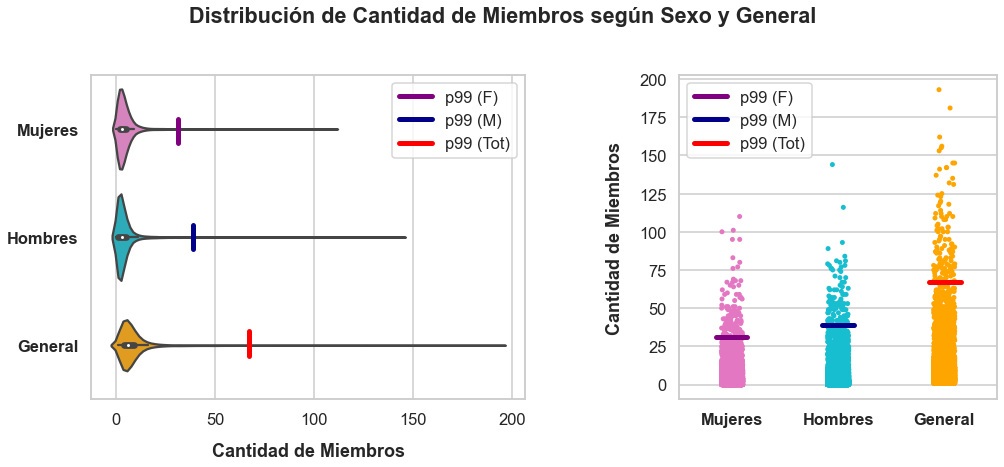

In [35]:
# Definimos el umbral de outlier de cada columna con el percentil 99
# Llamamos a nuestra función 'obtener_outliers_threshold()' para calcularlo
outlier_threshold_F = obtener_outliers_threshold(cantidad_miembros.cantidad_miembros_F, high_perc_lim=99)
outlier_threshold_M = obtener_outliers_threshold(cantidad_miembros.cantidad_miembros_M, high_perc_lim=99)
outlier_threshold_total = obtener_outliers_threshold(cantidad_miembros.cantidad_miembros_total, high_perc_lim=99)

# Informamos los umbrales de outliers de cada columna
print('Si tomamos como umbral de Outliers el percentil 99 de cada conjunto, entonces será:')
print('> Mujeres:\t%i Miembros' % outlier_threshold_F)
print('> Hombres:\t%i Miembros' % outlier_threshold_M)
print('> General:\t%i Miembros' % outlier_threshold_total)
print('_'*100)

# Definimos parámetros generales para los dos gráficos a realizar
colores = ['tab:pink', 'tab:cyan', 'orange']
sns.set(context="talk", style='whitegrid')
labels = ('Mujeres', 'Hombres', 'General')
value = 'Cantidad de Miembros'

# Creamos el subplot que utilizaremos para ver ambos gráficos
fig, axs= plt.subplots(1, 2, 
                    figsize= (16,9), 
                    gridspec_kw= {'width_ratios': [1.5,1.1]}
                   )

# Configuramos un violin plot para ver cómo se distribuyen los valores de cada columna
sns.violinplot(data= cantidad_miembros, orient='h', palette= colores, ax= axs[0])
axs[0].axvline(outlier_threshold_F, color='purple', 
               ymin=0.79, ymax=0.865, linewidth=5, 
               label='p99 (F)')
axs[0].axvline(outlier_threshold_M, color='darkblue', 
               ymin=0.4625, ymax=0.5375, linewidth=5, 
               label='p99 (M)')
axs[0].axvline(outlier_threshold_total, color='red', 
               ymin=0.135, ymax=0.21, linewidth=5, 
               label='p99 (Tot)')
axs[0].legend(loc = 'upper right') 
axs[0].set_yticklabels(labels, fontweight='bold')
axs[0].set_xlabel(value, fontweight='bold', labelpad=15)

# Configuramos un Strip Plot que nos permite complementar el gráfico anterior.
# Lo que se busca ver con esto es ver como se va generando dispersión 
# por arriba del umbral de outliers que hemos establecido más arriba.
sns.stripplot(data= cantidad_miembros, palette= colores, ax= axs[1], )
axs[1].axhline(outlier_threshold_F, color='purple', 
               xmin=0.115, xmax=0.215, linewidth=5, zorder=20, 
               label='p99 (F)')
axs[1].axhline(outlier_threshold_M, color='darkblue', 
               xmin=0.45, xmax=0.55, linewidth=5, zorder=10, 
               label='p99 (M)')
axs[1].axhline(outlier_threshold_total, color='red', 
               xmin=0.785, xmax=0.885, linewidth=5, zorder=10, 
               label='p99 (Tot)')
axs[1].legend(loc = 'upper left') 
axs[1].set_ylabel(value, fontweight='bold', labelpad=15)
axs[1].set_xticklabels(labels, fontweight='bold', rotation=0)

# Configuramos un título común a ambos gráficos
fig.suptitle('Distribución de Cantidad de Miembros según Sexo y General', 
             y=0.8 ,ha='center', va='baseline', fontweight='bold', fontsize='large')
# Configuramos separación entre gráficos
fig.tight_layout(pad=4.5)

# Guardamos el gráfico
plt.savefig('graphics/analisis_cantidad_miembros.png', bbox_inches='tight')
plt.show()

Observando los gráficos anteriores de manera conjunta, vemos que tanto para hombres como para mujeres, los valores presentan una densidad muy alta por debajo de 20 miembros, mientras que para el general esto se presenta para una cantidad de 40. Esta información se respalda con el cálculo del percentil 99 para todos los conjuntos. Para nuestro análisis **consideraremos outliers aquellos valores que superen el valor de dicho percentil**, por lo que debemos evaluar ahora cuántos registros tenemos por encima de este valor.

In [36]:
# Creamos un filtro para los valores que excedan los umbrales de outliers
filtro_F= (cantidad_miembros.cantidad_miembros_F > outlier_threshold_F)
filtro_M= (cantidad_miembros.cantidad_miembros_M > outlier_threshold_M)
filtro_tot = (cantidad_miembros.cantidad_miembros_total > outlier_threshold_total)

# Informamos la cantidad de valores que cumplen los filtros establecidos
print('Con el criterio del p99 de miembros de cada sexo tenemos %i registros Outliers.' 
      % cantidad_miembros[filtro_F | filtro_M].shape[0] )
print('Con el criterio del p99 del total de miembros tenemos %i registros Outliers.' 
      % cantidad_miembros[filtro_tot].shape[0] )

Con el criterio del p99 de miembros de cada sexo tenemos 171 registros Outliers.
Con el criterio del p99 del total de miembros tenemos 116 registros Outliers.


En función de lo anterior, **procedemos a eliminar de nuestro Data Set aquellos proyectos que presentan valores anómalos en el total de miembros**. Previo a esto, en nuestro Data Set de proyectos **también eliminaremos los registros nulos de las columnas de miembros**, ya que como vimos anteriormente, no implica una gran cantidad de registros, y calcularemos la columna de total de miembros.

In [37]:
# Eliminamos registros nulos en las columnas de cantidad de miembros
df_proyectos_pp.dropna(subset=['cantidad_miembros_F', 'cantidad_miembros_M'], inplace=True)

# Agregamos la columna de cantidad total de miembros
df_proyectos_pp['cantidad_miembros_total'] = df_proyectos_pp.cantidad_miembros_F + df_proyectos_pp.cantidad_miembros_M

# Eliminamos aquellos registros que tienen una cantidad de miembros total mayor al percentil 99
df_proyectos_pp = df_proyectos_pp[df_proyectos_pp.cantidad_miembros_total <= outlier_threshold_total]

# Informamos registros
informar_registros_perdidos(df_proyectos_pp.shape[0], ultimo_nro_registros, total_inicial_registros)

# Actualizamos el último valor de registros
ultimo_nro_registros = df_proyectos_pp.shape[0]

El NUEVO TOTAL de registros del Data Set luego de la última operación es de 11838.

En la última operación se han perdido 1331 registros, 
lo que representa un 10.11% del los 13169 registros que teniamos antes de la misma.

En lo que va del procesamiento se han perdido 7428 registros,
lo que representa un 38.55% del total inicial de 19266 de registros iniciales.



## NaNs de Columnas de Montos Solicitados
Como sabemos, nuestro Data Set cuenta con 4 columnas de fondos, entre las que se distinguen como Montos Solicitados (**monto_total_solicitado** y **monto_financiado_solicitado**), las cuales vimos que poseen casi un 5% de valores nulos, y Montos Adjudicados (**monto_total_adjudicado** y **monto_financiado_adjudicado**).

Para no continuar eliminando registros, analizaremos si existe una correlación entre estas variables y, de ser así, evaluaremos eliminar las columnas que poseen campos nulos. Para esto utilizaremos un **correlation heatmap** sobre estas variables.

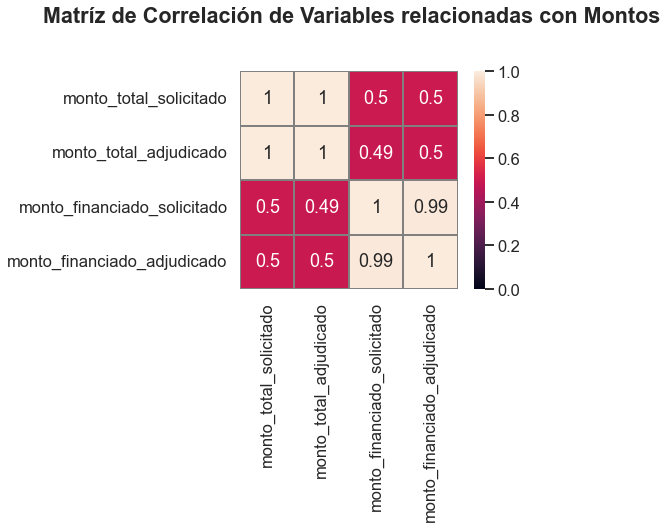

In [39]:
# Generamos una lista con los nombres de las columnas referidas a montos
columnas_montos = ['monto_total_solicitado', 
                   'monto_total_adjudicado', 
                   'monto_financiado_solicitado', 
                   'monto_financiado_adjudicado']

# Establecemos el título del gráfico
plt.suptitle('Matríz de Correlación de Variables relacionadas con Montos',
             ha='center', va='baseline', y=1.05, fontweight='bold', fontsize='large')

# Generamos un heatmap de la matríz de correlación de las variables de montos
sns.heatmap(df_proyectos_pp[columnas_montos].corr(), annot= True,
            linecolor= 'gray', linewidths= '2', square= True, vmin= 0, vmax= 1)

# Guardamos el gráfico
plt.savefig('graphics/correlation_heatmap_montos.png', bbox_inches='tight')
plt.show()

Como vemos, la opción de quedarnos con las columnas de montos adjudicados parece ser una opción viable. Ahora haremos un **scatter plot** de estas columnas para terminar de decidir.

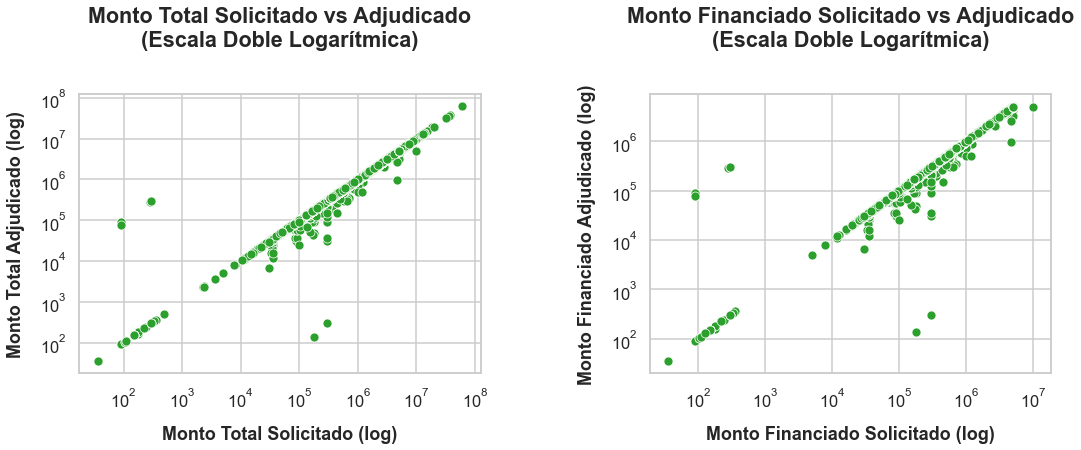

In [46]:
# Establecemos configuraciones comunes a ambos gráficos
c = ['tab:green']
pad = 5

# Generamos el subplot para poder mostrar dos gráficos en simultáneo
fig, axs = plt.subplots(1, 2, figsize=(17,9) )

# Generamos un scatter plot con los montos totales solicitados y adjudicados
sns.scatterplot(data= df_proyectos_pp,
                x= 'monto_total_solicitado',
                y= 'monto_total_adjudicado', 
                color=c, ax= axs[0] )

# Generamos un scatter plot con los montos financiados solicitados y adjudicados
sns.scatterplot(data= df_proyectos_pp,
                x= 'monto_financiado_solicitado',
                y= 'monto_financiado_adjudicado', 
                color=c, ax= axs[1] )

# Configuramos aspectos visuales comúnes a ambos gráfico
for ax_i in axs:
    ax_i.set_xscale('log')
    ax_i.set_yscale('log')
    
    x_label = ax_i.get_xlabel()
    x_label = x_label.replace('_', ' ').title() + ' (log)'
    ax_i.set_xlabel(x_label, fontweight='bold', labelpad=3*pad)
    
    y_label = ax_i.get_ylabel()
    y_label = y_label.replace('_', ' ').title() + ' (log)'
    ax_i.set_ylabel(y_label, fontweight='bold', labelpad=3*pad)
    

# Configuramos un título para cada gráfico
axs[0].set_title('Monto Total Solicitado vs Adjudicado\n(Escala Doble Logarítmica)', 
                 ha='center', va='baseline', y=1.15, fontweight='bold', fontsize='large')
axs[1].set_title('Monto Financiado Solicitado vs Adjudicado\n(Escala Doble Logarítmica)', 
                 ha='center', va='baseline', y=1.15, fontweight='bold', fontsize='large')

# Configuramos separación entre gráficos
fig.tight_layout(pad=pad)

# Guardamos el gráfico
plt.savefig('graphics/scatterplots_montos.png', bbox_inches='tight')
plt.show()

Como vemos arriba, las variables propuestas, salvo algunos valores aisladosm parecen tener una correlación lineal aceptable. Es por esto que procederemos a eliminar las columnas correspondientes a **montos solicitados**.

In [47]:
# Generamos una lista con los nombres de las columnas de montos solicitados
montos_solicitados = ['monto_total_solicitado', 'monto_financiado_solicitado']

# Eliminamos las columnas indicadas
df_proyectos_pp.drop(columns= montos_solicitados, axis=1, inplace=True) 

# Vemos como luce ahora nuestro Data Set
df_proyectos_pp.head()

,institucion_origen,fecha_inicio,fecha_finalizacion,monto_total_adjudicado,monto_financiado_adjudicado,estado,cantidad_miembros_F,cantidad_miembros_M,sexo_director,area_conocimiento,cantidad_miembros_total
0,CONICET,2009-01-01,2011-12-31,"89,850.00","89,850.00",Finalizado,3.00,1.00,F,Ciencias Naturales Y Exactas,4.00
2,CONICET,2009-01-01,2011-12-31,"180,000.00","180,000.00",Finalizado,4.00,6.00,F,Ingenierías Y Tecnologías,10.00
3,CONICET,2009-01-01,2011-12-31,"90,000.00","90,000.00",Finalizado,2.00,0.00,M,Ciencias Médicas Y De La Salud,2.00
4,CONICET,2009-01-01,2011-12-31,"36,000.00","36,000.00",Finalizado,1.00,0.00,M,Ciencias Médicas Y De La Salud,1.00
5,CONICET,2009-01-01,2011-12-31,"24,000.00","24,000.00",Finalizado,0.00,2.00,M,Ciencias Médicas Y De La Salud,2.00


## Verificamos que ya no haya NaNs
Procedemos a verificar si efectivamente nos hemos desecho de los registros nulos.

In [48]:
informar_NaNs(df_proyectos_pp)

,Total,Percent



____________________________________________________________________________________________________
Base: 11838 Registros


Como vemos **tenemos un total de 11.838 de registros NO NULOS**.

Con esto damos por terminado el análisis de NaNs.

# Análisis de Outliers en Montos de Proyectos
Dado que, como vimos más arriba, **algunos proyectos tienen como monto 0 y otros montos demasiado grandes**, haremos un análisis de outliers de estas variables.

In [49]:
# Vemos una descripción de nuestras variable numéricas
df_proyectos_pp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
monto_total_adjudicado,"11,838.00","904,206.35","1,602,021.86",0.00,"153,286.13","366,050.00","1,020,000.00","61,225,000.00"
monto_financiado_adjudicado,"11,838.00","355,817.72","643,629.69",36.00,"100,000.00","209,379.62","360,000.00","5,070,000.00"
cantidad_miembros_F,"11,838.00",4.20,4.32,0.00,2.00,3.00,5.00,45.00
cantidad_miembros_M,"11,838.00",3.83,4.89,0.00,1.00,3.00,5.00,49.00
cantidad_miembros_total,"11,838.00",8.03,8.03,1.00,4.00,6.00,9.00,67.00


Veamos esto de manera gráfica utilizando histogramas de frecuencia.

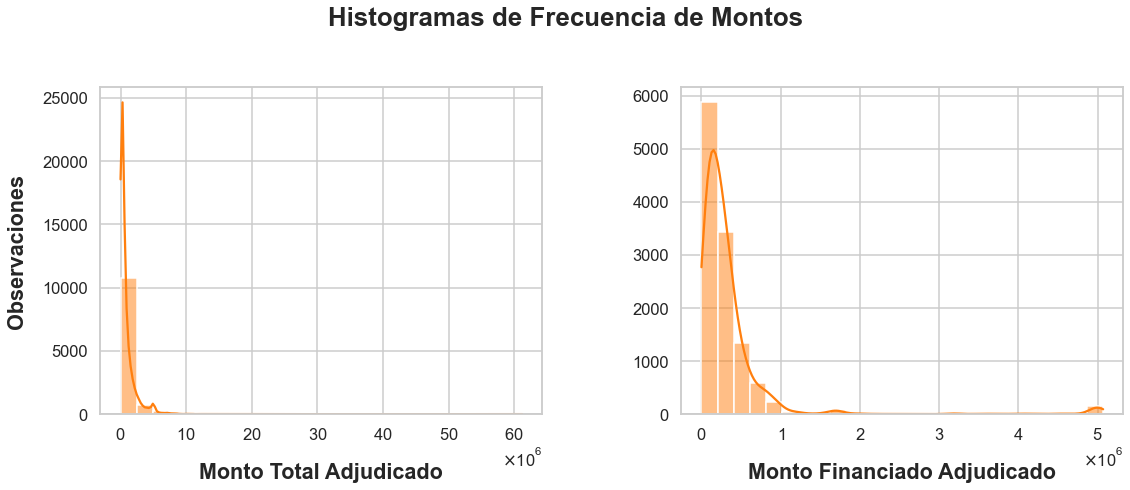

In [64]:
# Generamos una tupla con los nombre de las columnas de montos adjudicados
montos = ('monto_total_adjudicado', 'monto_financiado_adjudicado')

# Definimos parámetros generales para todos los gráficos
sns.set(context="poster", style='whitegrid')
pad=5
color = 'tab:orange'
sns.set(context="talk", style='whitegrid')

# Creamos el subplot que utilizaremos para ver todos los histogramas
fig, axs= plt.subplots(1, 2, 
                    figsize= (18, 8)
                   )

# Generamos y configuramos un histplot para cada variable de monto adjudicado
ax_i = 0
for i in montos:
    sns.histplot(df_proyectos_pp[i], 
                 bins= 25, 
                 kde= True,
                 color= color, 
                 ax= axs[ax_i])
    
    x_label = axs[ax_i].get_xlabel()
    x_label = x_label.replace('_', ' ').title()
    axs[ax_i].set_xlabel(x_label, fontweight='bold',  fontsize='large', labelpad=4*pad)
    
    if ax_i % 2 == 0:
        axs[ax_i].set_ylabel('Observaciones', fontweight='bold', fontsize='large', labelpad=3*pad)
    else:
        axs[ax_i].set_ylabel('')
    
    axs[ax_i].ticklabel_format(style='plain', axis='y',useOffset=False)
    axs[ax_i].ticklabel_format(axis='x', scilimits=(6,6), useMathText=True ,useOffset=False)
    
    ax_i += 1
    
# Configuramos separación entre gráficos
fig.tight_layout(pad=pad)

# Establecemos un título común a ambos gráficos
fig.suptitle('Histogramas de Frecuencia de Montos',
             ha='center', va='baseline', y=0.95, fontweight='bold', fontsize='x-large')
    
# Guardamos el gráfico
plt.savefig('graphics/histogramas_montos_outliers.png', bbox_inches='tight')
plt.show()

En los gráficos anteriores puede verse que hay valores (grandes) que parecen ser outliers. 

Para reforzar esta visualización, haremos un Box Plots.

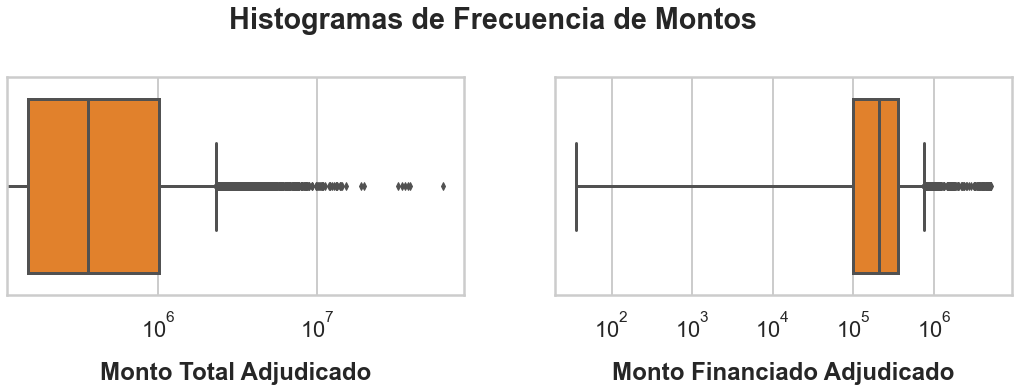

In [68]:
# Definimos parámetros generales para todos los gráficos
color = 'tab:orange'
sns.set(context="poster", style='whitegrid')
pad = 5

# Creamos el subplot que utilizaremos para ver todos los histogramas
fig, axs= plt.subplots(1, 2, 
                    figsize= (18, 4)
                   )

# Creamos y configuramos un Box Plot por cada variable de montos adjudicados
ax_i = 0
for i in montos:
    sns.boxplot(x= df_proyectos_pp[i], color= color, ax= axs[ax_i])
    
    axs[ax_i].set_xscale("log")
    
    x_label = axs[ax_i].get_xlabel()
    x_label = x_label.replace('_', ' ').title()
    axs[ax_i].set_xlabel(x_label, fontweight='bold', labelpad=4*pad)
    
    ax_i += 1
    

# Configuramos la separación entre gráficos
fig.tight_layout(pad=pad)

# Configuramos un título común a ambos gráficos
fig.suptitle('Histogramas de Frecuencia de Montos',
             ha='center', va='baseline', y=1.05, fontweight='bold', fontsize='large')

# Guardamos el gráfico
plt.savefig('graphics/boxplot_montos_outliers.png', bbox_inches='tight')
plt.show()

Como vemos en los boxplot, es evidente la existencia de outlier. Ahora analizaremos entonces los umbrales de outliers, tomando como límite el valor del percentil 99, para cada columna de monto y evaluaremos eliminar estos registros.

In [74]:
# Informamos la cantidad de outliers (por encima de p99) para cada columna de monto adjudicado
for i in montos:
    informar_outliers(data= df_proyectos_pp, col= i, high_perc_lim=99)
    print()

Para la columna monto_total_adjudicado se informan outliers de la siguiente manera.
Límite Percentil 99 = 6042209	=>	119 Registros por encima

Para la columna monto_financiado_adjudicado se informan outliers de la siguiente manera.
Límite Percentil 99 = 5000000	=>	1 Registros por encima



También verificaremos la existencia de valores de montos nulos.

In [75]:
# Informamos la cantidad de valores en 0 para cada columna de monto adjudicado
for i in montos:
    # Generamos filtro de monto cero
    monto_cero = (df_proyectos_pp[i] == 0)
    
    # Contamos la cantidad de registros que cumplen el filtro de arriba
    n_monto_cero = df_proyectos_pp[monto_cero].shape[0]
    
    print('La columna "%s" posee %i registros con monto "0"' % (i, n_monto_cero) )
    print()

La columna "monto_total_adjudicado" posee 14 registros con monto "0"

La columna "monto_financiado_adjudicado" posee 0 registros con monto "0"



Como vemos, **la cantidad de proyectos que registran outliers superiores y montos en cero es reducida, por lo cual procederemos a eliminarlos**.

In [76]:
for i in montos:
    
    # Calculamos el umbral de outliers de la columna
    superior = obtener_outliers_threshold(df_proyectos_pp[i], high_perc_lim= 99)
    
    # Generamos un filtro para tomar valores mayores a 0
    mask_low = (df_proyectos_pp[i] >= 0)
    
    # Generamos un filtro para tomar valores menores o iguales al umbral calculado
    mask_high = (df_proyectos_pp[i] <= superior)
    
    # Filtramos el Data Set por las condiciones establecidas más arriba
    df_proyectos_pp = df_proyectos_pp[mask_low & mask_high]
    

# Informamos la cantidad de registros que hemos peridido en este proceso
informar_registros_perdidos(cur_nreg= df_proyectos_pp.shape[0], 
                            last_nreg= ultimo_nro_registros, 
                            init_nreg= total_inicial_registros)

# Actualizamos el último número de registros
ultimo_nro_registros = df_proyectos_pp.shape[0]

El NUEVO TOTAL de registros del Data Set luego de la última operación es de 11719.

En la última operación se han perdido 119 registros, 
lo que representa un 1.01% del los 11838 registros que teniamos antes de la misma.

En lo que va del procesamiento se han perdido 7547 registros,
lo que representa un 39.17% del total inicial de 19266 de registros iniciales.



Volvemos a graficar los histogramas y vemos los cambios.

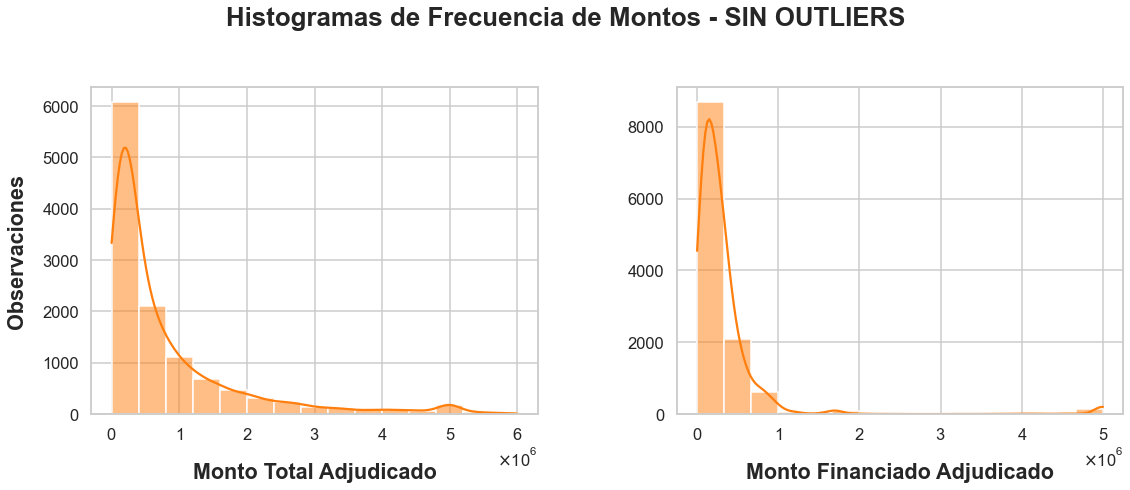

In [79]:
# Definimos parámetros generales para todos los gráficos
sns.set(context="poster", style='whitegrid')
pad=5
color = 'tab:orange'
sns.set(context="talk", style='whitegrid')

# Creamos el subplot que utilizaremos para ver todos los histogramas
fig, axs= plt.subplots(1, 2, 
                    figsize= (18, 8)
                   )

# Generamos y configuramos un histplot para cada variable de monto adjudicado
ax_i = 0
for i in montos:
    sns.histplot(df_proyectos_pp[i], 
                 bins= 15, 
                 kde= True,
                 color= color, 
                 ax= axs[ax_i])
    
    x_label = axs[ax_i].get_xlabel()
    x_label = x_label.replace('_', ' ').title()
    axs[ax_i].set_xlabel(x_label, fontweight='bold',  fontsize='large', labelpad=4*pad)
    
    if ax_i % 2 == 0:
        axs[ax_i].set_ylabel('Observaciones', fontweight='bold', fontsize='large', labelpad=3*pad)
    else:
        axs[ax_i].set_ylabel('')
    
    axs[ax_i].ticklabel_format(style='plain', axis='y',useOffset=False)
    axs[ax_i].ticklabel_format(axis='x', scilimits=(6,6), useMathText=True ,useOffset=False)
    
    ax_i += 1


# Configuramos la separación entre gráficos
fig.tight_layout(pad=pad)

# Configuramos un título común a ambos gráficos
fig.suptitle('Histogramas de Frecuencia de Montos - SIN OUTLIERS',
             ha='center', va='baseline', y=0.95, fontweight='bold', fontsize='x-large')

# Guardamos el gráfico
plt.savefig('graphics/histogramas_montos_procesado.png', bbox_inches='tight')
plt.show()

Como vemos, el aspecto de nuestros gráficos ha mejorado mucho.

Con esto damos por finalizado el tratamiento de outliers.

# Establecemos Duración y Año de cada Proyecto
Ahora que ya **hemos terminado el análisis de NaNs y outliers**, y tenemos un Data Set limpio, procederemos a agregar dos columnas adicionales. Una de ellas es el año de inicio del proyecto, a la que llamaremos **año_inicio**, y otra que tendrá la duración de los proyectos en días, a la que llamaremos **duracion_dias**.

Para generar ambas columnas recurriremos a la librería **datetime (dt)**.

Veamos que haremos en cada caso:
- **año_inicio**:      Utilizaremos **.dt.year** aplicado sobre **fecha_inicio**.
- **duracion_dias**:   Debemos calcular la diferencia en días entre la **fecha_finalizacion** y la **fecha_inicio**, para lo cual utilizaremos **.dt.days**.

In [168]:
df_proyectos_pp['año_inicio'] = df_proyectos_pp.fecha_inicio.dt.year
df_proyectos_pp['duracion_dias'] = (df_proyectos_pp.fecha_finalizacion - df_proyectos_pp.fecha_inicio).dt.days
df_proyectos_pp.head()

,institucion_origen,fecha_inicio,fecha_finalizacion,monto_total_adjudicado,monto_financiado_adjudicado,estado,cantidad_miembros_F,cantidad_miembros_M,sexo_director,area_conocimiento,cantidad_miembros_total,año_inicio,duracion_dias
0,CONICET,2009-01-01,2011-12-31,"89,850.00","89,850.00",Finalizado,3.00,1.00,F,Ciencias Naturales Y Exactas,4.00,2009,1094
2,CONICET,2009-01-01,2011-12-31,"180,000.00","180,000.00",Finalizado,4.00,6.00,F,Ingenierías Y Tecnologías,10.00,2009,1094
3,CONICET,2009-01-01,2011-12-31,"90,000.00","90,000.00",Finalizado,2.00,0.00,M,Ciencias Médicas Y De La Salud,2.00,2009,1094
4,CONICET,2009-01-01,2011-12-31,"36,000.00","36,000.00",Finalizado,1.00,0.00,M,Ciencias Médicas Y De La Salud,1.00,2009,1094
5,CONICET,2009-01-01,2011-12-31,"24,000.00","24,000.00",Finalizado,0.00,2.00,M,Ciencias Médicas Y De La Salud,2.00,2009,1094


# Procedemos a realizar un Análisis del Data Set
Como primer paso veremos una descripción de las variables numéricas.

In [488]:
df_proyectos_pp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
monto_total_adjudicado,"11,719.00","810,274.28","1,064,466.06",0.00,"150,100.00","360,000.00","996,164.00","6,000,000.00"
monto_financiado_adjudicado,"11,719.00","347,582.98","632,832.02",36.00,"100,000.00","201,053.58","345,140.00","5,000,000.00"
cantidad_miembros_F,"11,719.00",4.18,4.31,0.00,2.00,3.00,5.00,45.00
cantidad_miembros_M,"11,719.00",3.80,4.88,0.00,1.00,3.00,5.00,49.00
cantidad_miembros_total,"11,719.00",7.98,8.02,1.00,4.00,6.00,9.00,67.00
año_inicio,"11,719.00","2,013.32",2.61,"2,009.00","2,011.00","2,013.00","2,015.00","2,019.00"
duracion_dias,"11,719.00",774.12,594.93,30.00,92.00,"1,035.00","1,095.00","3,651.00"


Veamos ahora un **correlation heatmap**.

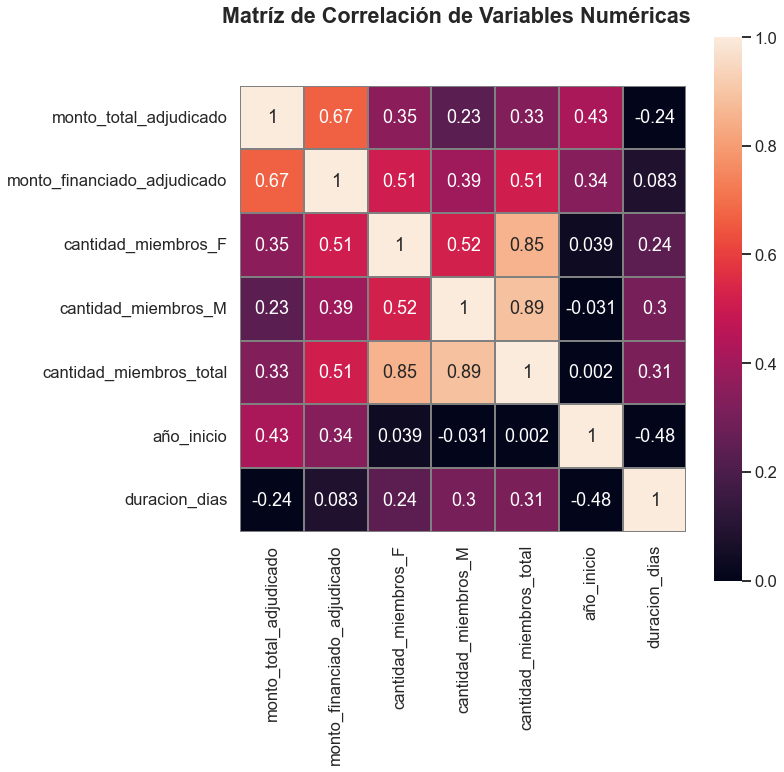

In [489]:
# Establecemos parámetros de nuestro gráfico
plt.figure(figsize=(10,10))
sns.set(context="talk", style='whitegrid')

# Configuramos un título para nuestro gráfico
plt.suptitle('Matríz de Correlación de Variables Numéricas',
             ha='center', va='baseline', x=0.425, y=0.9, fontweight='bold')

# Generamos el heatmap de correlación de todas nuestras variables numéricas
sns.heatmap(df_proyectos_pp.corr(), annot= True,
            linecolor='gray', linewidths='2', square=True, vmin=0, vmax=1, )

# Guardamos el gráfico
plt.savefig('graphics/correlation_heatmap_dataset.png', bbox_inches='tight')
plt.show()

Como podemos observar, las variables referidas a montos parecen correlacionar mejor entre si que con el resto de las variables. Como era de esperarse, las variables de cantidad de miembro parecen correllacionar mejor entre si. También podemos ver una leve correlación entre la variable **monto_financiado_adjudicado** y **cantidad_miembros_total**.

Es interesante ver que año de inicio tiene una pequeña correlación con las variables de montos. Esto era de esperarse, ya que los montos de los proyectos están expresados en pesos, y seguramente parte de recursos de los proyectos se costean en dolares.

AHora realizaremos un pequeño análisis gráfico utilizando conjuntamente variables numéricas y categóricas,

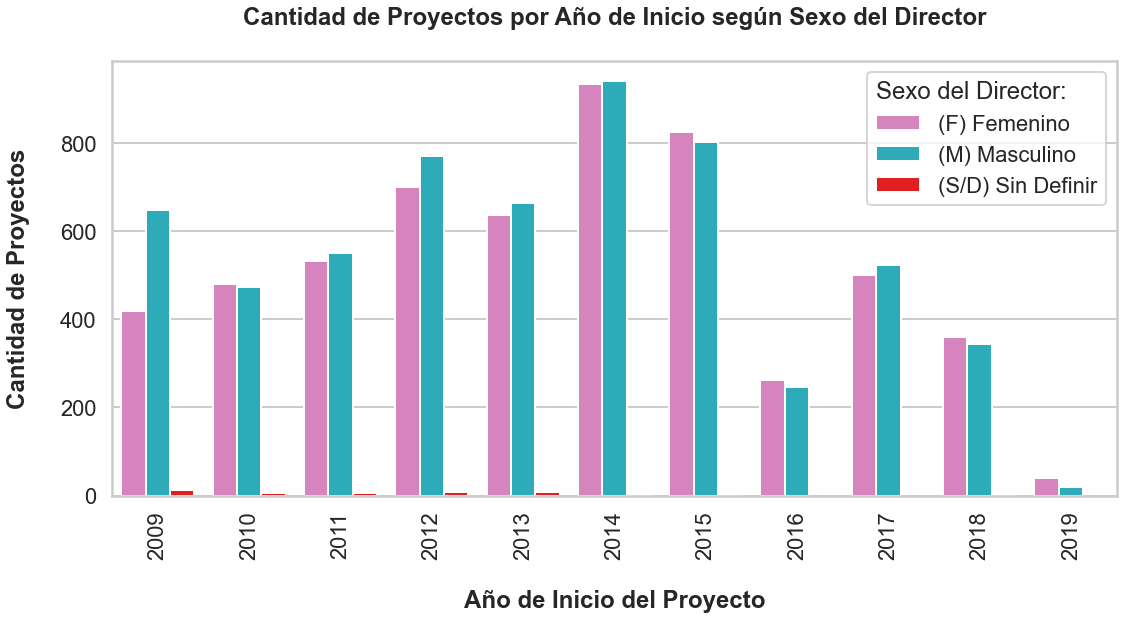

In [491]:
# Definimos parámetros generales de nuestro gráfico
colores = ['tab:pink', 'tab:cyan', 'red']
sns.set(context="poster", style='whitegrid')
lgds=['(F) Femenino', '(M) Masculino', '(S/D) Sin Definir']
pad=30
plt.figure(figsize= (18, 8) )

# Generamos y configuramos un countplot
sns.countplot(data=df_proyectos_pp, x='año_inicio', hue='sexo_director', palette=colores)
plt.xticks(rotation = 90)
plt.xlabel('Año de Inicio del Proyecto', labelpad= pad, fontweight='bold')
plt.ylabel('Cantidad de Proyectos', labelpad= pad, fontweight='bold')
legend= plt.legend(title='Sexo del Director:', labels= lgds, loc='upper right')
legend._legend_box.align = "left"

# Configuramos un título para nuestro gráfico
plt.title('Cantidad de Proyectos por Año de Inicio según Sexo del Director',
          pad=1.2*pad, fontweight='bold')

# Guardamos el gráfico
plt.savefig('graphics/cant_proyectos_año_sexo_director.png', bbox_inches='tight')
plt.show()

Podemos ver que, salvo en 2009, **los proyectos parecen repartirse equitativamente entre directores de Sexo Femenino y Masculino**.

También vemos que, en comparación, los proyectos en lo que el Sexo del director es **Sin Definir (S/D)**. Lo que haremos es proceder a eliminar estos registros, ya que no aportan nada a nuestro modelo.

In [492]:
# Eliminamos de nuestro Data Set aquellos registros que tengan 'S/D' como valor de 'sexo_director'
df_proyectos_pp = df_proyectos_pp[df_proyectos_pp.sexo_director != 'S/D']

# Informamos la cantidad de registros perdidos
informar_registros_perdidos(cur_nreg=df_proyectos_pp.shape[0], 
                            last_nreg= ultimo_nro_registros, 
                            init_nreg=total_inicial_registros)

# Actualizamos el último número de registros
ultimo_nro_registros = df_proyectos_pp.shape[0]

El NUEVO TOTAL de registros del Data Set luego de la última operación es de 11672.

En la última operación se han perdido 47 registros, 
lo que representa un 0.40% del los 11719 registros que teniamos antes de la misma.

En lo que va del procesamiento se han perdido 7594 registros,
lo que representa un 39.42% del total inicial de 19266 de registros iniciales.



Tal como comentamos más arriba, podemos verificar que la cantidad de registros eliminados es despreciable, y conseguimos eliminar una clase que no aporta nada a nuestro modelo.

Analicemos ahora como se distribuyen, **año a año**,  los proyectos según su **Área de Conocimiento**. Esto nos permitirá comprender a que áreas son las que presentan mayor cantidad de proyectos.

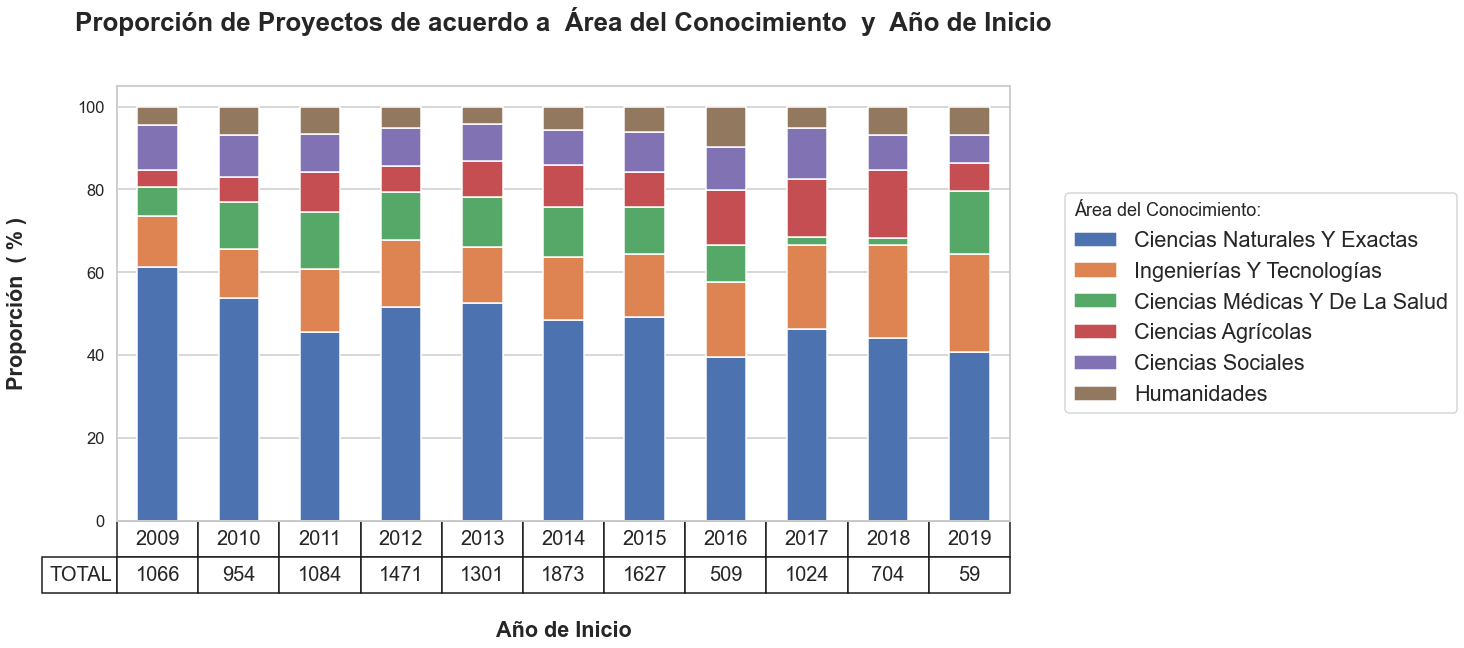

In [503]:
# Definimos parámetros generales de nuestro gráfico
sns.set(context="talk", style='whitegrid')
pad=50

# Generamos un gráfico de columnas apiladas 
# llamando a nuestra función 'stacked_bars_graph()'
stacked_bars_graph(data= df_proyectos_pp,
                  group_col= 'año_inicio',
                  cat_col= 'area_conocimiento',
                  percent= True,
                  table= True,
                  figsize=(16,8))

# Configuramos un título para nuestro gráfico
plt.title('Proporción de Proyectos de acuerdo a  Área del Conocimiento  y  Año de Inicio',
          pad=1.1*pad, fontweight='bold', fontsize='x-large')

# Configuramos la leyenda de nuestras categorías
legend = plt.legend(title='Área del Conocimiento:',
                        fontsize='large', 
                        loc='center left', 
                        bbox_to_anchor=(1.05, 0.5))
legend._legend_box.align = "left"

# Configuramos etiquetas para los ejes
plt.xlabel('Año de Inicio', fontweight='bold', labelpad=2*pad, fontsize='large')
plt.ylabel('Proporción  ( % )', fontweight='bold', labelpad=pad, fontsize='large')

# Guardamos el gráfico
plt.savefig('graphics/proporcion_area_conocimiento_año.png', bbox_inches='tight')
plt.show()

Como vemos, los proyectos de **Ciencias Naturales y Exactas** son lo que **todos los años se llevan la mayor proporción**. En **segundo lugar** podemos encontrar los de **Ingenierías y Tecnologías**.

Las áreas **Ciencias Agrícolas**, **Ciencias Sociales** y **Humanidades** parecen **mantener la proporción año a año**.

Habiendo analizado las áreas de conocimiento año a año, nos proponemos analizar como se distibuyen los proyectos en función de su **Institución de Origen**.

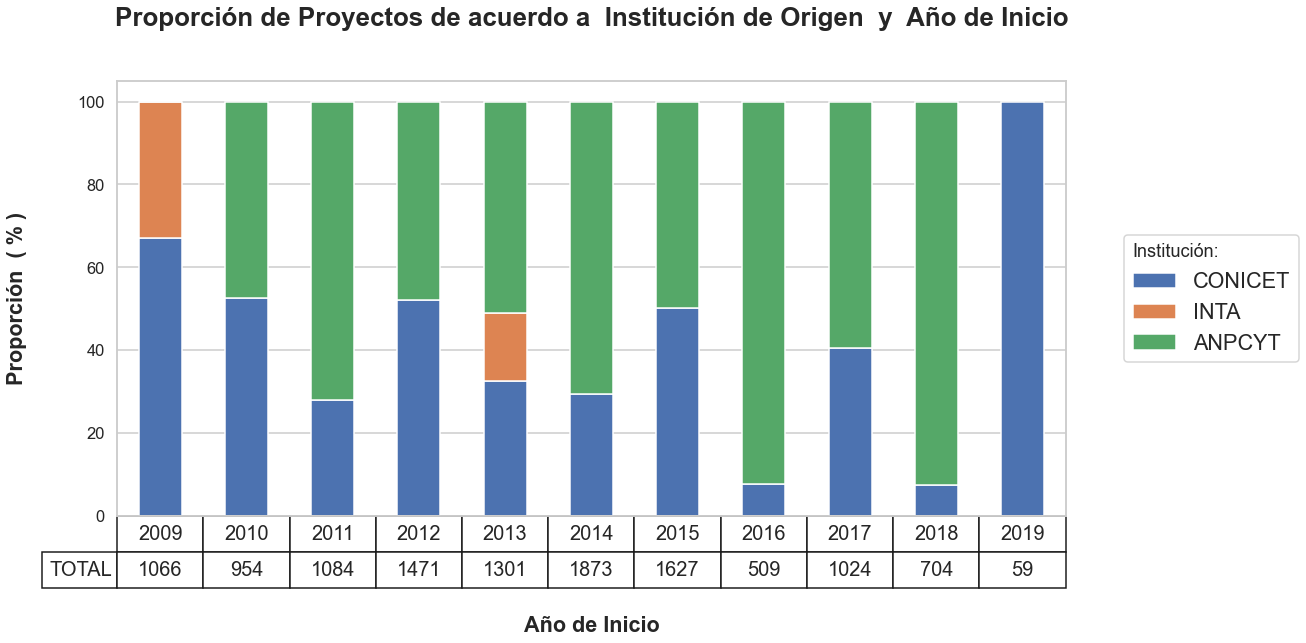

In [504]:
# Definimos parámetros generales de nuestro gráfico
sns.set(context="talk", style='whitegrid')
pad=50

# Generamos un gráfico de columnas apiladas 
# llamando a nuestra función 'stacked_bars_graph()'
stacked_bars_graph(data= df_proyectos_pp,
                  group_col= 'año_inicio',
                  cat_col= 'institucion_origen',
                  percent= True,
                  table= True,
                  figsize=(17,8))

# Configuramos un título para nuestro gráfico
plt.title('Proporción de Proyectos de acuerdo a  Institución de Origen  y  Año de Inicio',
          pad=1.1*pad, fontweight='bold', fontsize='x-large')

# Configuramos la leyenda de nuestras categorías
legend = plt.legend(title='Institución:',
                        fontsize='large', 
                        loc='center left', 
                        bbox_to_anchor=(1.05, 0.5))
legend._legend_box.align = "left"

# Configuramos etiquetas para los ejes
plt.xlabel('Año de Inicio', fontweight='bold', labelpad=2*pad, fontsize='large')
plt.ylabel('Proporción  ( % )', fontweight='bold', labelpad=pad, fontsize='large')

# Guardamos el gráfico
plt.savefig('graphics/proporcion_institucion_año.png', bbox_inches='tight')
plt.show()

Como vemos, la **mayor proporción año a año** la presenta **ANPCYT** (Agencia Nacional de Promoción de la Investigación, el Desarrollo Tecnológico y la Innovación). En **segundo lugar** encontramos al **CONICET**. Esto parece tener lógica, ya que es esperable que estas insticuiones desarrollen proyectos de **Ciencias Naturales y Exactas** y de **Ingenierías y Tecnologías**, siendo estas áreas la que ocupaban la mayor proporción en el gráfico anterior.

Otro aspecto a rescatar de este gráfico es que el **INTA** solo muestra proyectos en los años **2009** y **2013**. Seguramente esta institución tiene proyectos en el resto de los años pero, o bien no ha proporcionado los datos, o no lo ha hecho de manera completa, y los hemos perdido durante la limpieza de nuestro Data Set. **Esto puede ser un problema**, ya que puede ser que la cantidad de registros de esta instución no sean suficientes como **para** que **nuestro modelo de Machine Learning** pueda "aprender" de ellos.

Ahora haremos un Pair Grid plot, visualizando en el tanto KDE Plots (kernel density estimate), como Scatter Plots, de nuestras principales variables numéricas, que son **Cantidad Total de Miembros**, **Monto Total Adjudicado** y **Duración en Días**. Además mantendremos la categorización de acuerdo a la **institución de origen**. El objetivo de esto es poder mejorar nuestra comprensión de como se distribuyen, y posiblemente agrupan, nuestros datos en función a las variables que consideramos más relevantes.

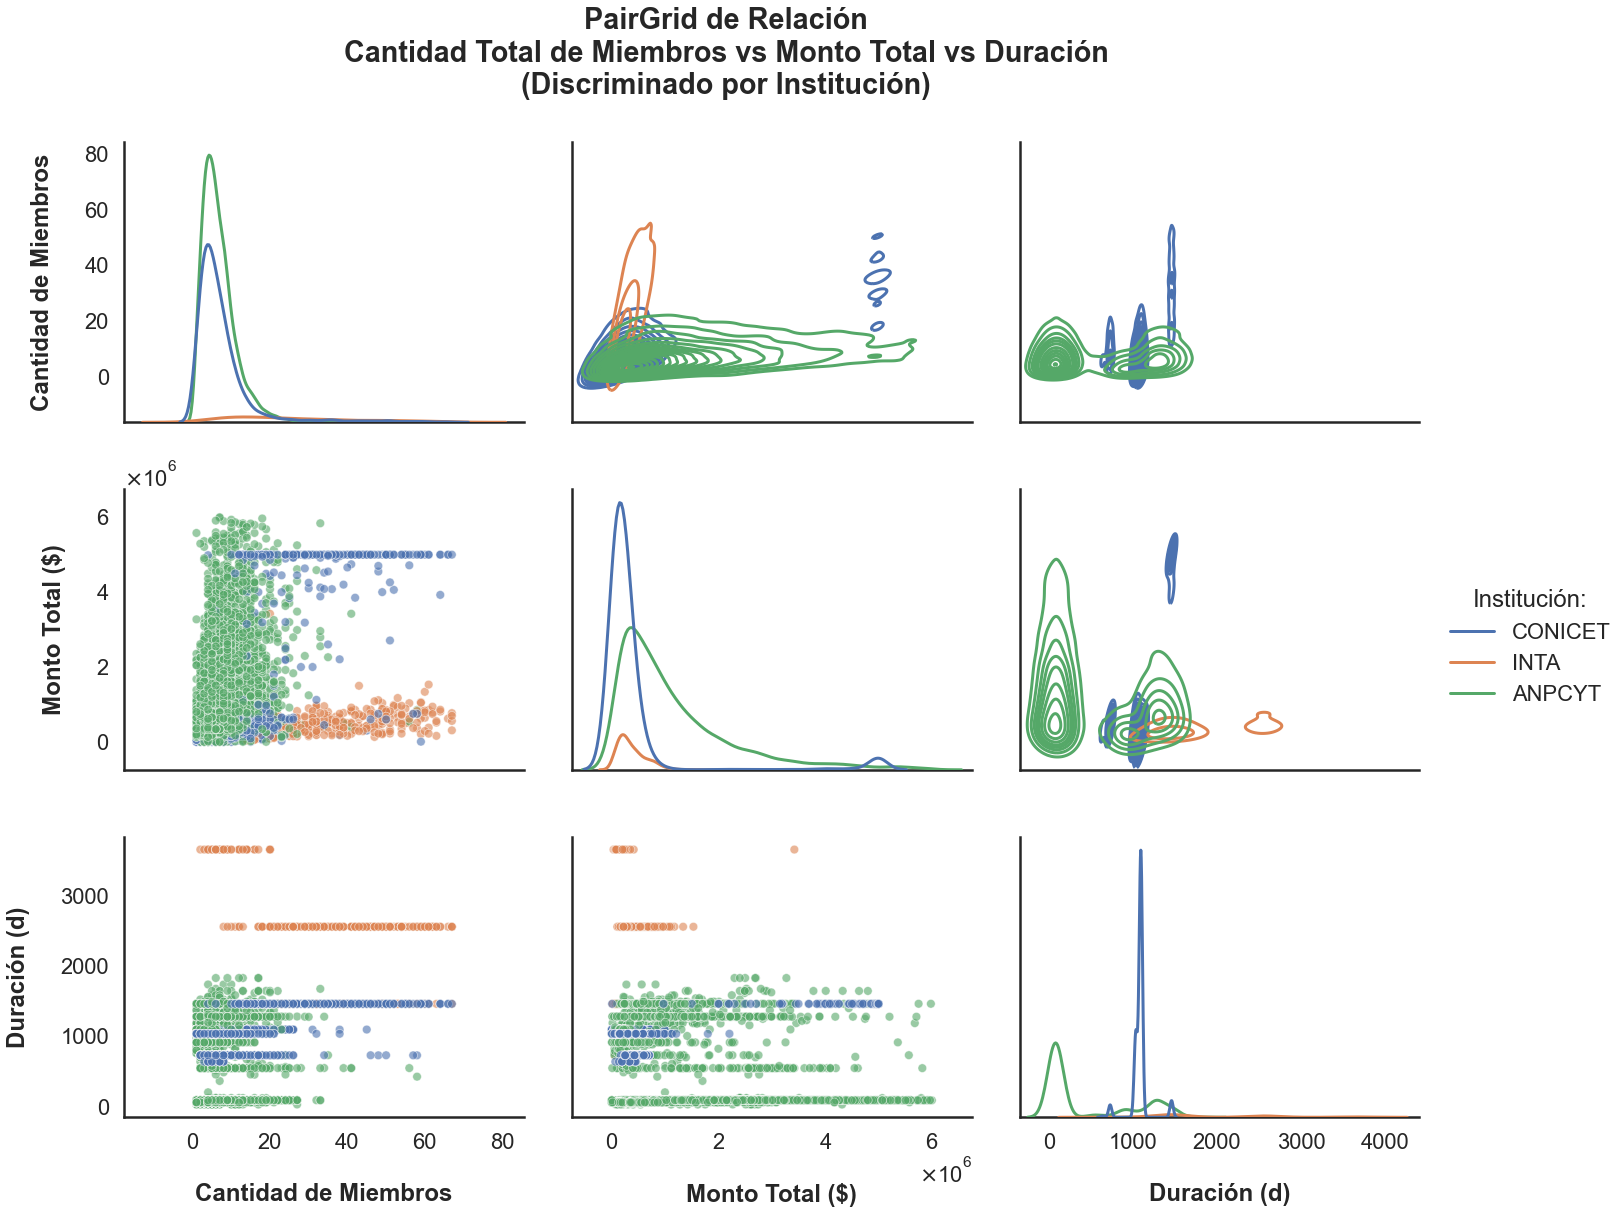

In [639]:
# Definimos parámetros generales de nuestro gráfico
sns.set(context="poster", style='white')
pad = 30
axis_labels = ('Cantidad de Miembros', 'Monto Total ($)', 'Duración (d)')

# Generamos y configuramos un PairGrid con nuestras principales variables numéricas
# Haciendo una distinción de categorías según la institución de origen
g = sns.PairGrid(df_proyectos_pp[ ['cantidad_miembros_total',
                                   'monto_total_adjudicado', 
                                   'duracion_dias', 
                                   'institucion_origen'] ],
                 diag_sharey=False, hue='institucion_origen', height=5.25, aspect=1.15)
g.map_lower(sns.scatterplot, s=75, alpha=0.6)
g.map_upper(sns.kdeplot, thresh= 0, levels= 20)
g.map_diag(sns.kdeplot)
g.add_legend(title='Institución:' )
g.figure.tight_layout(pad=2)
g.figure.get_children()[-1].set_bbox_to_anchor((1.1, 0.5, 0, 0))

# Configuramos los ejes de nuestros gráficos
for i in range(3):
    g.axes[2][i].set_xlabel(axis_labels[i], labelpad=pad, fontweight='bold')
    g.axes[i][0].set_ylabel(axis_labels[i], labelpad=pad, fontweight='bold')

g.axes[2][1].ticklabel_format(axis='x', useMathText=True)
g.axes[1][0].ticklabel_format(axis='y',useMathText=True)

# Configuramos un título general para el gráfico
titulo = 'PairGrid de Relación\n'
titulo += 'Cantidad Total de Miembros vs Monto Total vs Duración\n'
titulo += '(Discriminado por Institución)'
plt.suptitle(titulo, ha='center', va='baseline', y=1, fontweight='bold', fontsize='large')

# Guardamos el gráfico
plt.savefig('graphics/pairgrid_monto_miembros_duracion.png', bbox_inches='tight')
plt.show()

Como era de esperarse, en los gráficos de distirbución no llegan a apreciarse las curvas correspondiente al **INTA**. Esto se debe a que, como comentamos antes, esta instución tiene una cantidad muy reducida de registros, en comparación a las otras dos.

Del gráfico de **Monto Total** vs **Cantidad de Miembros** podemos observar algunas cosas interesantes. Una de ellas es que muchos proyectos de **CONICET** tienen un mismo importe de **Monto Total**, a pesar de que presentan una cantidad de miembros que ocupa todo el rango. Sería interesante poder averiguar un poco más al respecto, ya que esto no parece ser un fenómeno normal. Por otro lado, podemos observar que los proyectos del **INTA** presentan una variedad de **Monto Total** acotada a un rango bien definido, el cual es bajo, mientras que, por el contrario, la **Cantidad de Miembros** se encuentra por encima del rango que abarca a la mayor cantidad de proyectos. Por último, podemos comentar que los proyectos del **ANPCYT** presentan un rango acotado de **Cantidad de Miembros**, pero un amplio rango de **Monto Total** en sus proyectos.

En lo que respecta a la **Duración**, podemos concluir que los proyectos del **INTA** son lo que **mayor duración presentan**, mientras que una parte de los de **ANPCYT** son los de **menor duración**.

Por último, analizaremos como se distribuye la **Cantidad de Miembros Masculinos y Femeninos** en función del **Sexo del Director** del proyecto. Con esto buscamos ver si hay alguna tendencia que nos haga pensar que haya cierto favoritismo a la hora de elegir miembros.

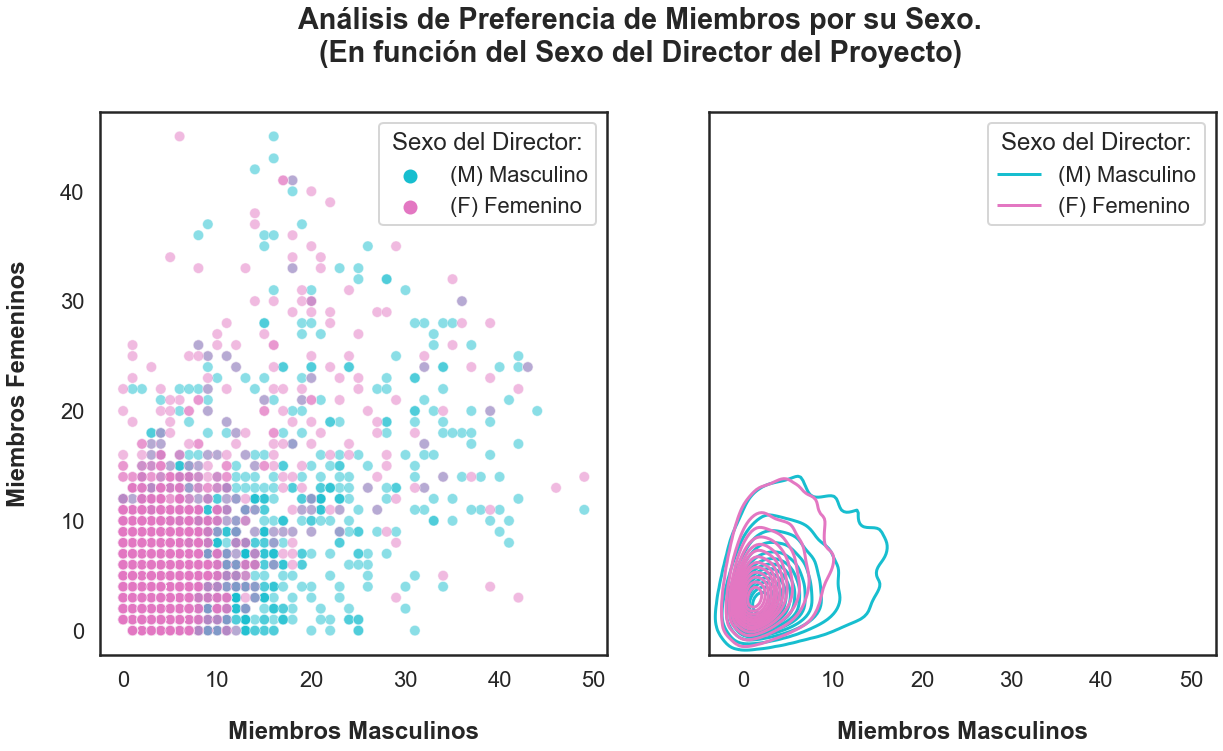

In [640]:
# Definimos parámetros generales de nuestro gráfico
sns.set(context="poster", style='white')
colores = ['tab:cyan', 'tab:pink']
pad = 30
eje_x= 'Miembros Masculinos'
eje_y= 'Miembros Femeninos'
leyenda_tit = 'Sexo del Director:'
leyendas = ['(M) Masculino', '(F) Femenino']

# Generamos el subplots para poder visualizar dos gráficos en paralelo
fig, axs = plt.subplots(1,2, figsize= (20,10))

# Generamos y configuramos un scatter plot con la cantidad 
# de miembros de cada sexo, diferenciada por el sexo del director
sns.scatterplot(data= df_proyectos_pp.sort_values(by= 'sexo_director', ascending=False),
                x= 'cantidad_miembros_M',
                y= 'cantidad_miembros_F',
                s=110, alpha=0.5,
                hue= 'sexo_director', palette= colores, ax=axs[0])
handles= axs[0].get_legend_handles_labels()[0]
axs[0].legend(title = leyenda_tit, handles= handles, labels= leyendas)
axs[0].set_xlabel(eje_x, labelpad= pad, fontweight= 'bold')
axs[0].set_ylabel(eje_y, labelpad= pad, fontweight= 'bold')

sexo_director = df_proyectos_pp.sexo_director.sort_values(ascending=False).unique().tolist()

for i in range(len(sexo_director)):
    # Generamos una gráfica de KDE PLot por cada sexo de director
    sns.kdeplot(data= df_proyectos_pp[df_proyectos_pp.sexo_director == sexo_director[i]],
                x= 'cantidad_miembros_M',
                y= 'cantidad_miembros_F',
                thresh=0, levels= 15, linewidth=5, color=colores[i], ax=axs[1])
axs[1].legend(title = leyenda_tit, labels= leyendas)
axs[1].set_xlabel(eje_x, labelpad= pad, fontweight= 'bold')
axs[1].get_yaxis().set_visible(False)

# Configuramos un título general para el gráfico
titulo= 'Análisis de Preferencia de Miembros por su Sexo.\n'
titulo += '(En función del Sexo del Director del Proyecto)'
fig.suptitle(titulo, fontweight='bold', fontsize='large',
             ha='center', va='baseline', y=0.95)

# Guardamos el gráfico
plt.savefig('graphics/preferencia_sexo_director.png', bbox_inches='tight')
plt.show()

Como podemos ver, en rasgos generales, la **Cantidad de Miembros Masculinos y Femeninos** parece estar **bien distribuida**. Cómo único comentario podríamos decir que aquellos proyectos cuyo **director es de sexo femenino** parecen tener la tendencia de mantener una **menor proporción de miembros masculinos respecto de los femeninos**, mientras que en aquellos proyectos en que su **director es de sexo masculino**, para una cantidad de miembros total similar, parecen mantener una **proporción más pareja de miembros de ambos sexos**.

## Exportamos el Data-Set Pre-Procesado
Así damos por finalizado el Análisis Exploratorio de Datos de nuestro Data Set. Por lo cual, **procedemos a exportar la versión Pre-Procesada para su posterior uso durante el desarrollo de nuestro modelo de Machine Learning**.

In [638]:
# Generamos la ruta y el nombre con el que se almacenará el Data Set Procesado
file_name = 'data/procesada/proyectos_procesado.csv'
# Generamos el tipo de separador con el que queremos que se exporte
sep = ';'

# Pasamos los valores indicados más arriba e indicamos que no queremos que exporte el index
df_proyectos_pp.to_csv(file_name, sep=sep, header=True, index=False)